**Author: [Sudhanshu Singh](https://github.com/sudhanshusinghaiml "Github Profile")**

# Problem Statement

- The data of different types of wine sales in the 20th century is to be analysed. Both Sparkling Wine and Rose Wine data are from the same company. The objective is to analyze the current sales figures to build the most optimum model(s) on the complete data and forecast Wine Sales into the next 12 months future with appropriate confidence intervals/bands.

In [1]:
import numpy as np      # numpy Array
import pandas as pd     # Pandas
import matplotlib.pyplot as plt  # for plotting the data in Daataframe or Series
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose  # decomposing the time series

from sklearn.linear_model import LinearRegression #For Linear Regression Models
from sklearn.metrics import mean_squared_error #For RMSE of the Models

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1. Read the data as an appropriate Time Series data and plot the data.

**I. Read the data as TimeSeries for Sparkling Wines**

In [3]:
sparkling_df = pd.read_csv('Sparkling.csv')

In [4]:
sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [5]:
sparkling_df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [6]:
sparkling_df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [7]:
sparkling_df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [8]:
sparkling_df.describe(include='all')

YearMonth    Sparkling
count        187   187.000000
unique       187          NaN
top      1980-01          NaN
freq           1          NaN
mean         NaN  2402.417112
std          NaN  1295.111540
min          NaN  1070.000000
25%          NaN  1605.000000
50%          NaN  1874.000000
75%          NaN  2549.000000
max          NaN  7242.000000

In [9]:
sparkling_df = pd.read_csv('Sparkling.csv', parse_dates=['YearMonth'], index_col= 'YearMonth')

In [10]:
sparkling_df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [11]:
sparkling_df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [12]:
# Database dimension
print("Dataset dimension - Sparkling Wine                          :",sparkling_df.shape)

#Database size
print("Dataset size - Sparkling Wine                               :",sparkling_df.size)

Dataset dimension - Sparkling Wine                          : (187, 1)
Dataset size - Sparkling Wine                               : 187


**II. Ploting the actual Monthly Time Series data for Sparkling Wines**

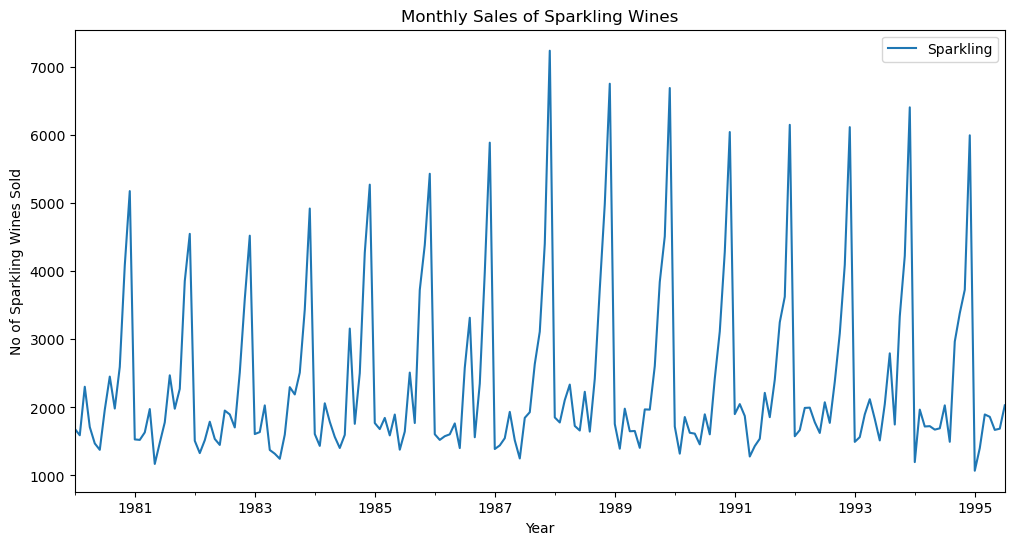

In [13]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
sparkling_df.plot()

plt.title('Monthly Sales of Sparkling Wines')
plt.xlabel('Year')
plt.ylabel('No of Sparkling Wines Sold')
plt.show()

**III. Ploting the Quarterly Time Series data by resampling for Sparkling Wines**

In [14]:
# Changing the monthly series to quarterly by aggregating.
quarterly_sparkling_df = sparkling_df.resample('Q').mean()

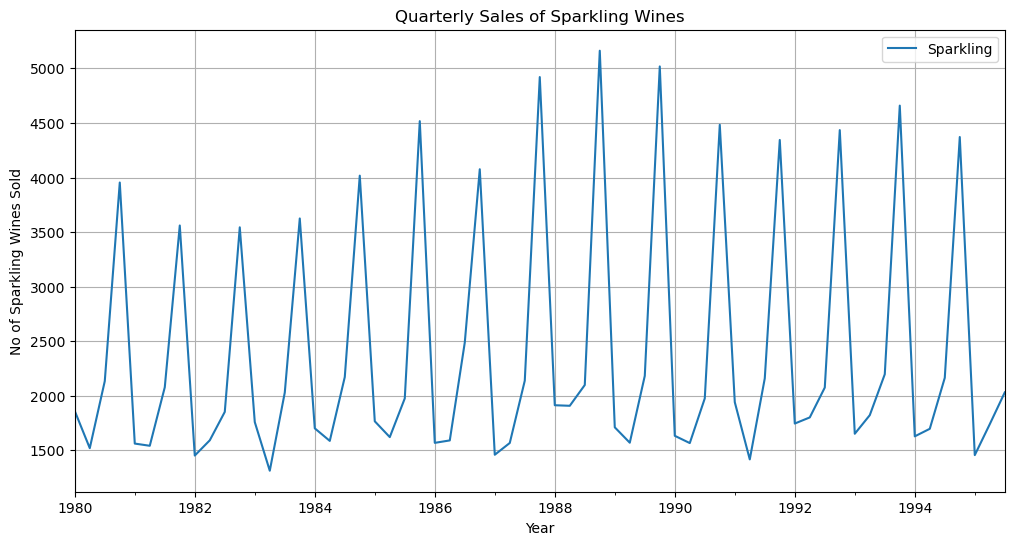

In [15]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

quarterly_sparkling_df.plot()
plt.title('Quarterly Sales of Sparkling Wines')
plt.xlabel('Year')
plt.ylabel('No of Sparkling Wines Sold')

plt.grid()
plt.show()

**IV. Ploting the Yearly Time Series data by resampling for Sparkling Wines**

In [16]:
# Changing the monthly series to quarterly by aggregating.
yearly_sparkling_df = sparkling_df.resample('Y').mean()

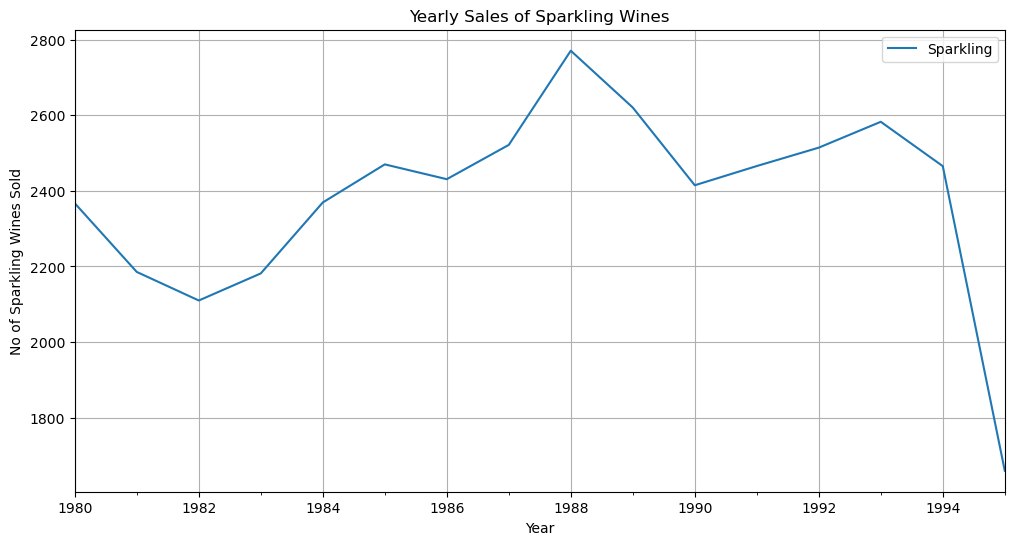

In [17]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

yearly_sparkling_df.plot()
plt.title('Yearly Sales of Sparkling Wines')
plt.xlabel('Year')
plt.ylabel('No of Sparkling Wines Sold')

plt.grid()
plt.show()

**V. Ploting the Daily Time Series data by resampling for Sparkling Wines**

In [18]:
# Changing the monthly series to quarterly by aggregating.
daily_sparkling_df = sparkling_df.resample('D').ffill()

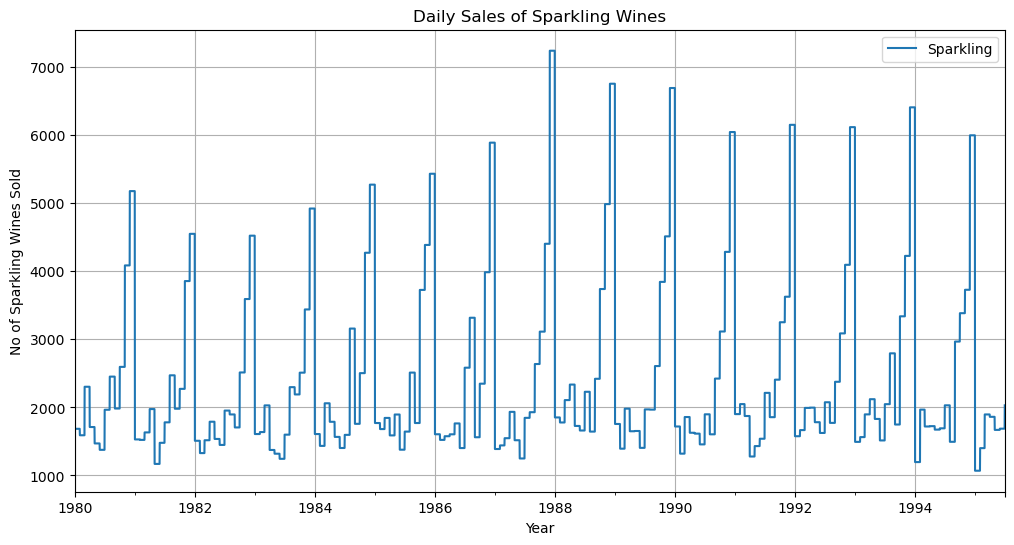

In [19]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

daily_sparkling_df.plot()
plt.title('Daily Sales of Sparkling Wines')
plt.xlabel('Year')
plt.ylabel('No of Sparkling Wines Sold')

plt.grid()
plt.show()

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

**I. EDA**

In [20]:
sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [21]:
sparkling_df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

**III. Handling Missing Values**

In [22]:
sparkling_df.isnull().sum()

Sparkling    0
dtype: int64

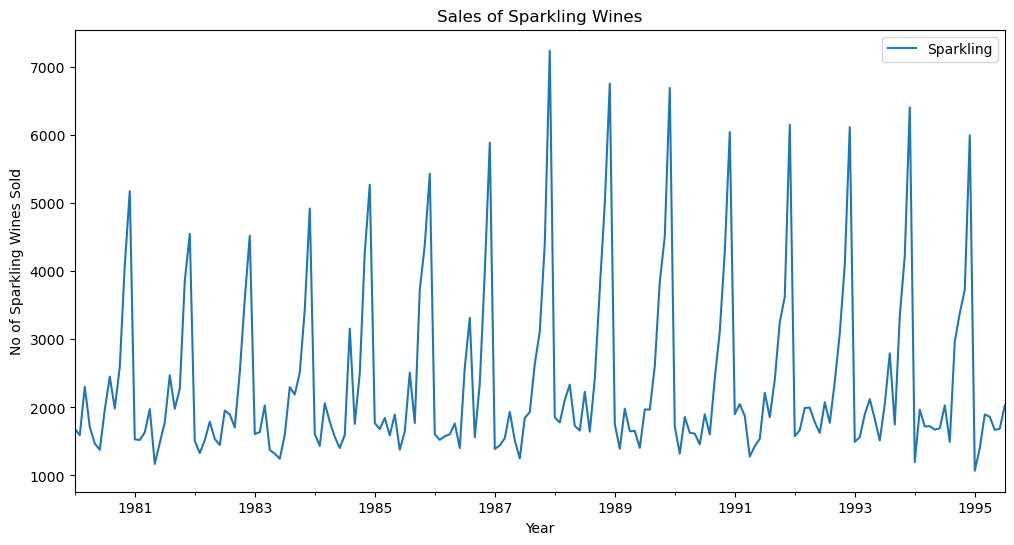

In [26]:
treated_sparkling_df = sparkling_df
treated_sparkling_df.plot()
plt.title('Sales of Sparkling Wines')
plt.xlabel('Year')
plt.ylabel('No of Sparkling Wines Sold')
plt.show()

In [27]:
treated_sparkling_df.isnull().sum()

Sparkling    0
dtype: int64

#### Yearly Boxplot

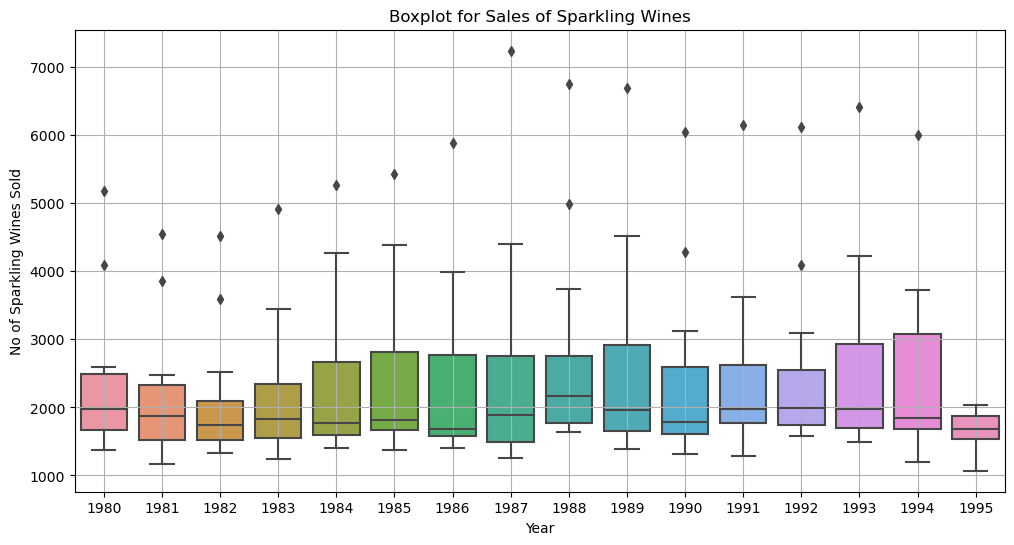

In [28]:
sns.boxplot(x = sparkling_df.index.year,y = sparkling_df['Sparkling'])
plt.title('Boxplot for Sales of Sparkling Wines')
plt.xlabel('Year')
plt.ylabel('No of Sparkling Wines Sold')
plt.grid();

### Monthly Boxplot

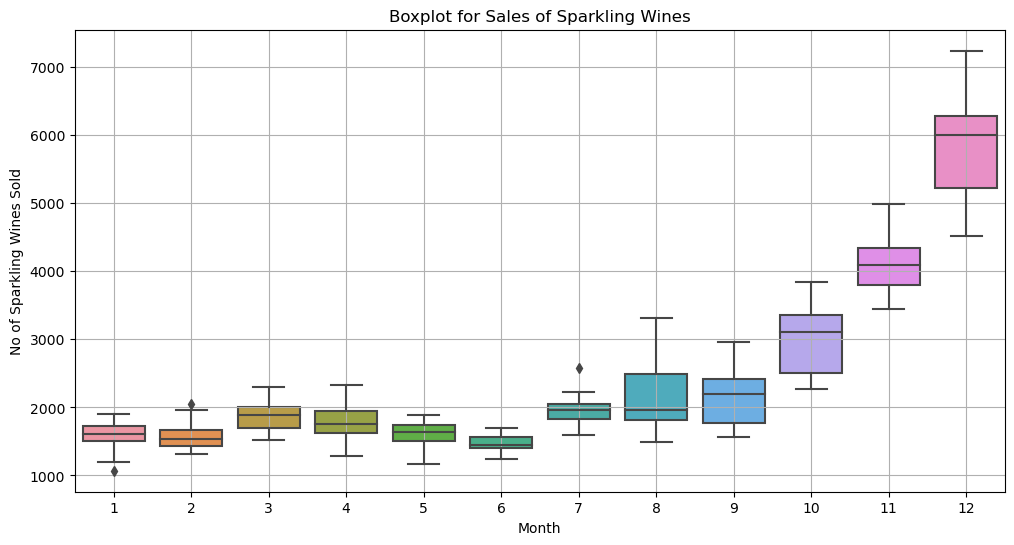

In [29]:
sns.boxplot(x = sparkling_df.index.month,y = sparkling_df['Sparkling'])
plt.title('Boxplot for Sales of Sparkling Wines')
plt.xlabel('Month')
plt.ylabel('No of Sparkling Wines Sold')
plt.grid();

#### Ploting a time series monthplot to understand the spread of Sales across different years and within different months across years.

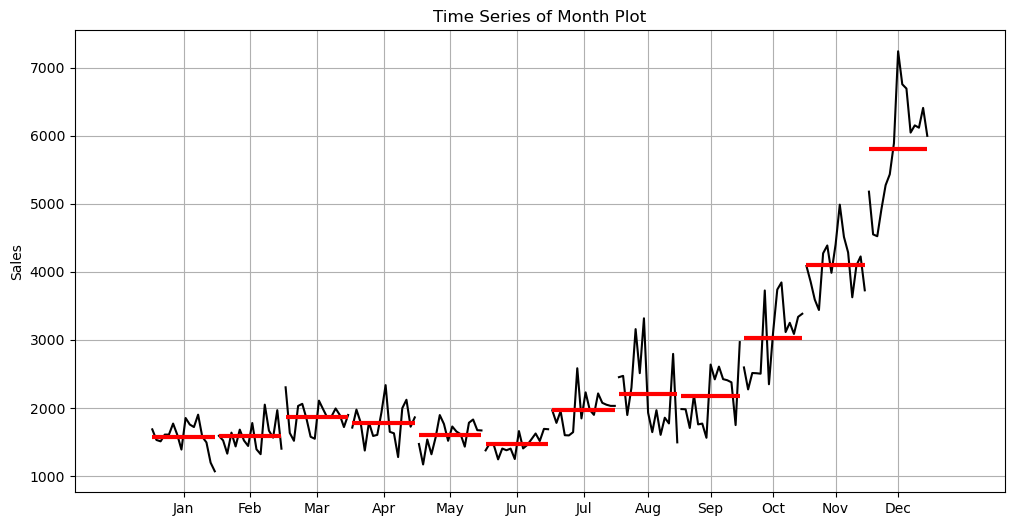

In [30]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(sparkling_df['Sparkling'],ylabel='Sales')
plt.title('Time Series of Month Plot')
plt.grid();

### Plot the Empirical Cumulative Distribution.


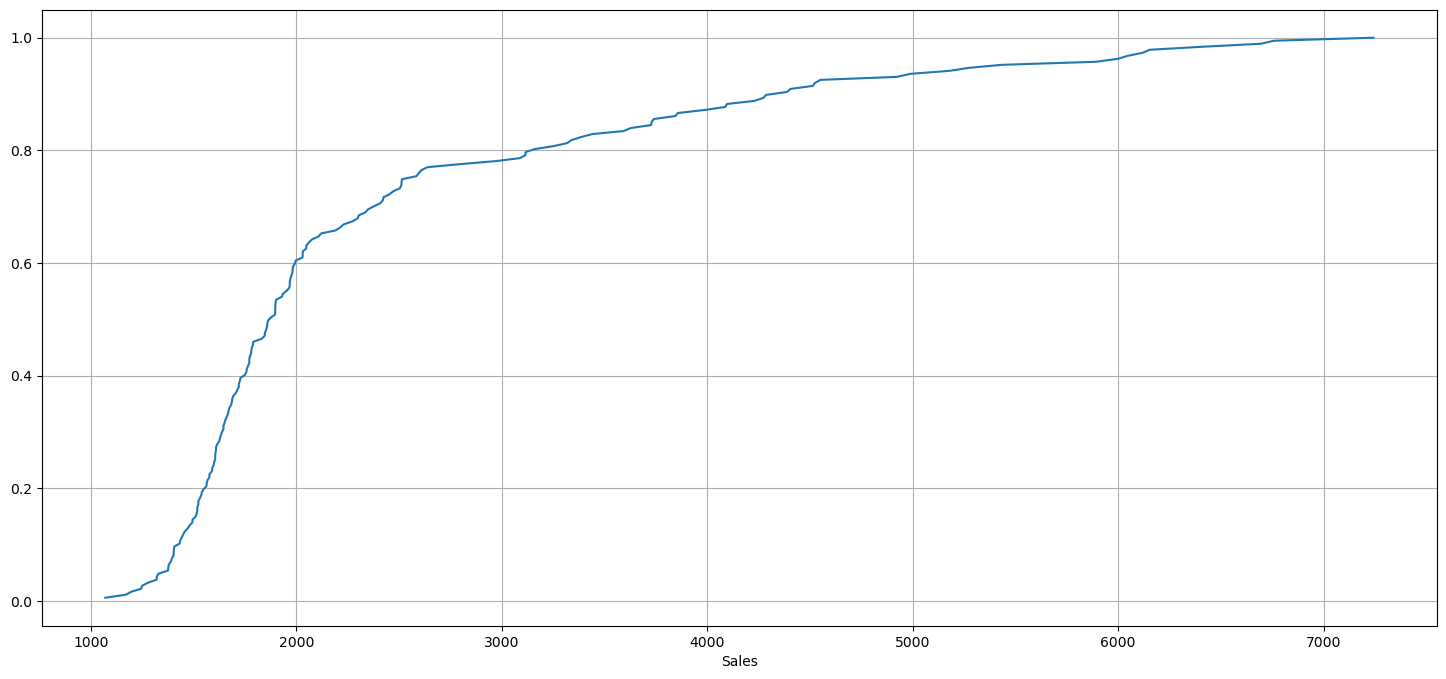

In [31]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(sparkling_df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average Sparkling Wine per month and the month on month percentage change of Wine Sales.

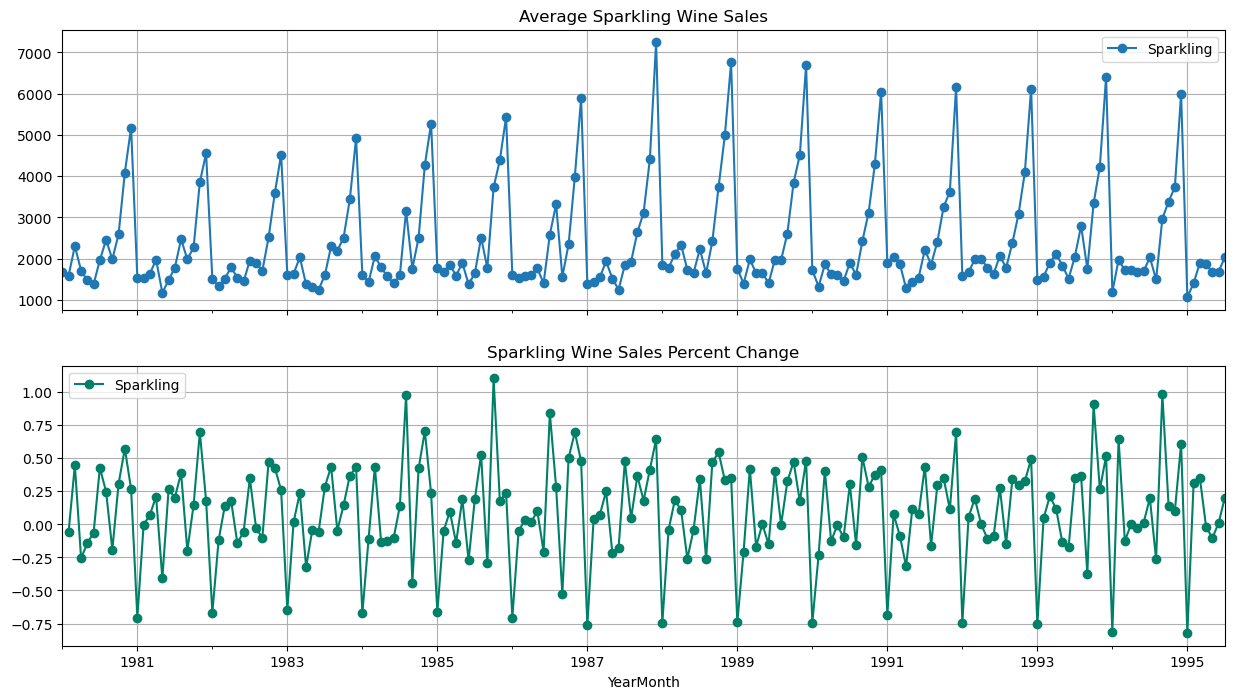

In [32]:
# group by date and get average RetailSales, and precent change
average    = sparkling_df.groupby(sparkling_df.index)["Sparkling"].mean()
pct_change = sparkling_df.groupby(sparkling_df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

**VI. Yearly Sales across Months for Sparkling Wines**

In [33]:
sparkling_yearly_sales_across_all_months = pd.pivot_table(treated_sparkling_df, values='Sparkling', columns= sparkling_df.index.month, 
                                                    index = sparkling_df.index.year)
sparkling_yearly_sales_across_all_months

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

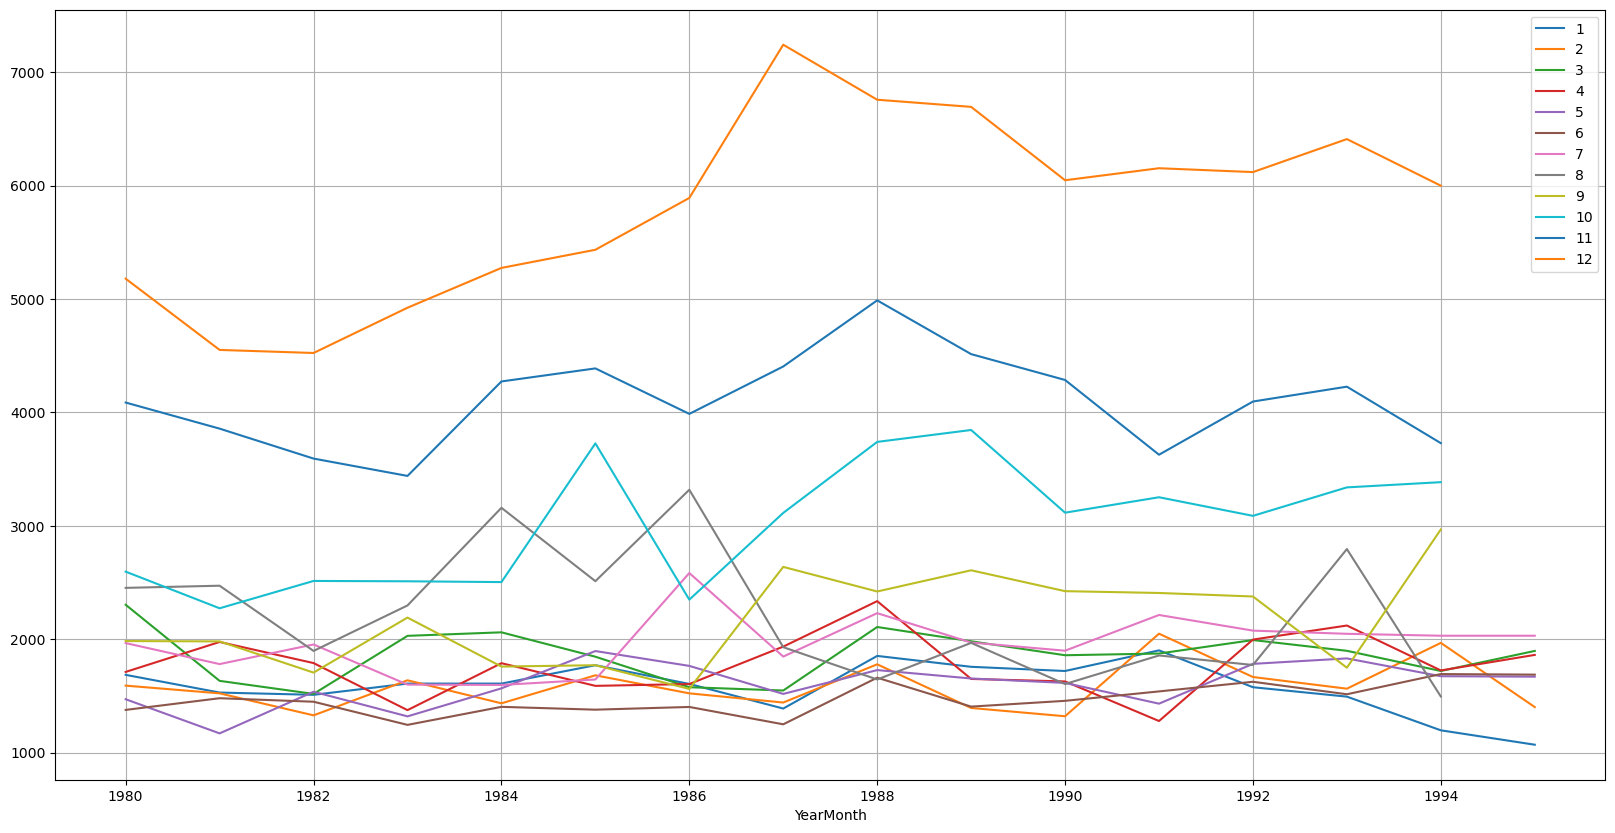

In [34]:
sparkling_yearly_sales_across_all_months.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

**IV. Decomposing the Time Series Data using Additive Methods**

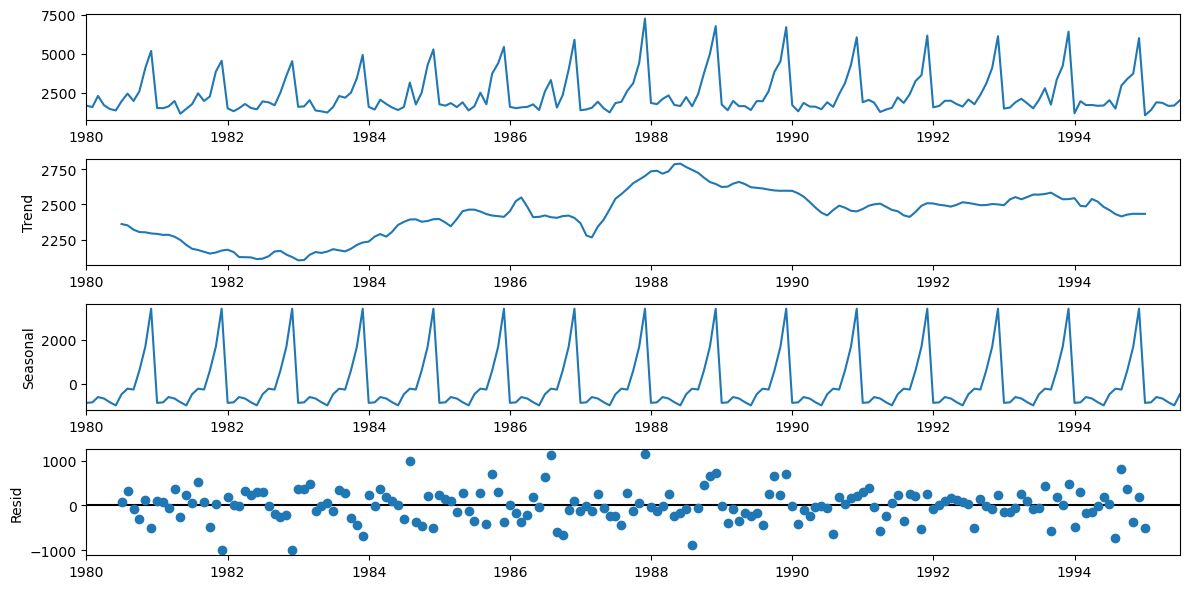

In [35]:
sparkling_df_additive_decompose = seasonal_decompose(treated_sparkling_df, model ='additive')
sparkling_df_additive_decompose.plot()
plt.show()

In [36]:
trend = sparkling_df_additive_decompose.trend
seasonality = sparkling_df_additive_decompose.seasonal
residual = sparkling_df_additive_decompose.resid

In [37]:
print('Trend','\n',trend.round(2).head(10),'\n')
print('Seasonality','\n',seasonality.round(2).head(10),'\n')
print('Residual','\n',residual.round(2).head(10),'\n')

Trend 
 YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2360.67
1980-08-01    2351.33
1980-09-01    2320.54
1980-10-01    2303.58
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -854.26
1980-02-01   -830.35
1980-03-01   -592.36
1980-04-01   -658.49
1980-05-01   -824.42
1980-06-01   -967.43
1980-07-01   -465.50
1980-08-01   -214.33
1980-09-01   -254.68
1980-10-01    599.77
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01     70.84
1980-08-01    316.00
1980-09-01    -81.86
1980-10-01   -307.35
Name: resid, dtype: float64 



**V. Decomposing the Time Series Data using Multiplicative Methods**

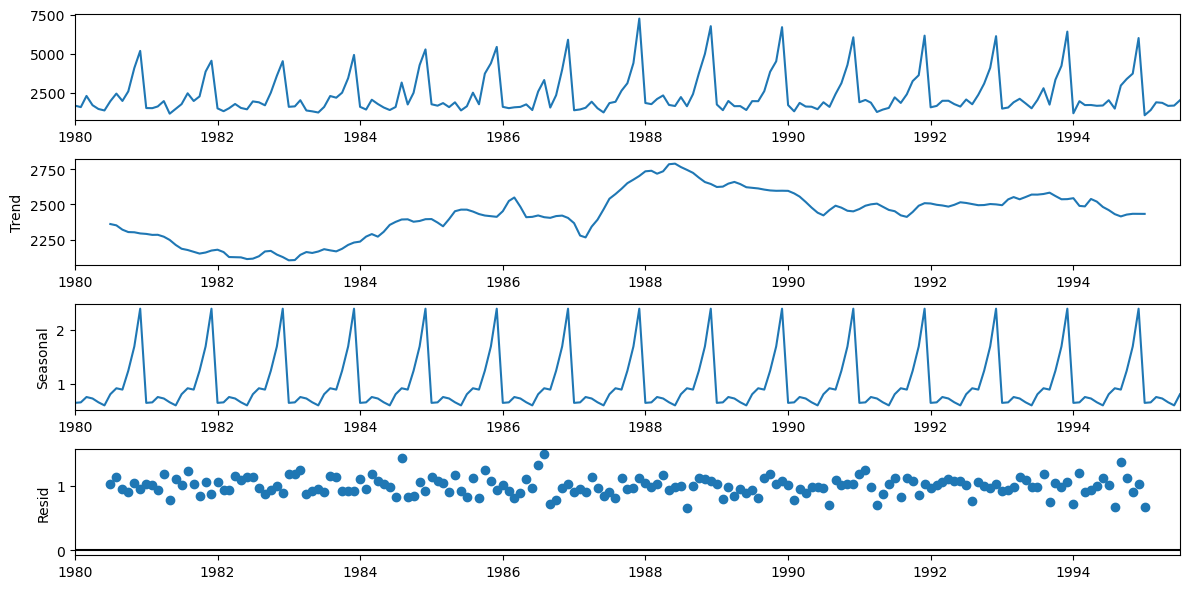

In [38]:
sparkling_df_multiplicative_decompose = seasonal_decompose(treated_sparkling_df, model ='multiplicative')
sparkling_df_multiplicative_decompose.plot()
plt.show()

In [39]:
trend = sparkling_df_multiplicative_decompose.trend
seasonality = sparkling_df_multiplicative_decompose.seasonal
residual = sparkling_df_multiplicative_decompose.resid

In [40]:
print('Trend','\n',trend.round(2).head(10),'\n')
print('Seasonality','\n',seasonality.round(2).head(10),'\n')
print('Residual','\n',residual.round(2).head(10),'\n')

Trend 
 YearMonth
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01    2360.67
1980-08-01    2351.33
1980-09-01    2320.54
1980-10-01    2303.58
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.65
1980-02-01    0.66
1980-03-01    0.76
1980-04-01    0.73
1980-05-01    0.66
1980-06-01    0.60
1980-07-01    0.81
1980-08-01    0.92
1980-09-01    0.89
1980-10-01    1.24
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01     NaN
1980-02-01     NaN
1980-03-01     NaN
1980-04-01     NaN
1980-05-01     NaN
1980-06-01     NaN
1980-07-01    1.03
1980-08-01    1.14
1980-09-01    0.96
1980-10-01    0.91
Name: resid, dtype: float64 



### 3. Split the data into training and test. The test data should start in 1991.

In [41]:
train = treated_sparkling_df.loc[treated_sparkling_df.index.year<1991]
test = treated_sparkling_df.loc[treated_sparkling_df.index.year>=1991]

In [42]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last few rows of Training Data 
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First few rows of Test Data 
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last few rows of Test Data 
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031 



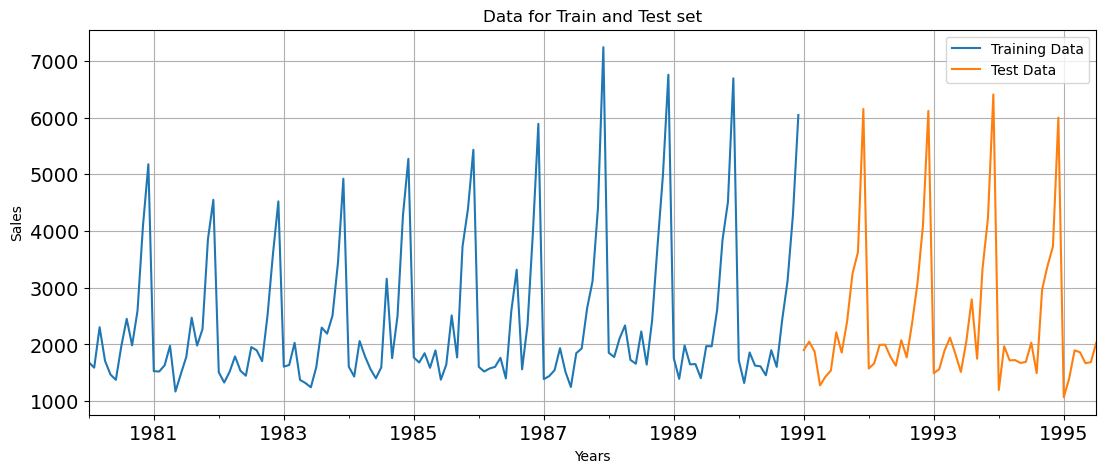

In [43]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Data for Train and Test set')
plt.ylabel('Sales')
plt.xlabel('Years')
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE

### **I. Linear Regression**

- For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [44]:
sparkling_train_time = [i+1 for i in range(len(train))]
sparkling_test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',sparkling_train_time)
print('Test Time instance','\n',sparkling_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


**We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.**

In [45]:
Sparkling_LinearRegression_train = train.copy()
Sparkling_LinearRegression_test = test.copy()

Sparkling_LinearRegression_train['time'] = sparkling_train_time
Sparkling_LinearRegression_test['time'] = sparkling_test_time

print('First few rows of Training Data','\n',Sparkling_LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',Sparkling_LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',Sparkling_LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',Sparkling_LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902    43
1991-02-01       2049    44
1991-03-01       1874    45
1991-04-01       1279    46
1991-05-01       1432    47 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897    93
1995-04-01       1862    94
1995-05-01       1670    95
1995-06-01       1688    96
1995-07-01       2031    97 



In [46]:
sparkling_lr_regression = LinearRegression()
sparkling_lr_regression.fit(Sparkling_LinearRegression_train[['time']], Sparkling_LinearRegression_train['Sparkling'].values)

LinearRegression()

In [47]:
sparkling_linearregression_test_prediction = sparkling_lr_regression.predict(Sparkling_LinearRegression_test[['time']])
Sparkling_LinearRegression_test['RegOnTime'] = sparkling_linearregression_test_prediction

## Test Data - RMSE
RMSE_sparkling_model_01 = mean_squared_error(test['Sparkling'],sparkling_linearregression_test_prediction,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(RMSE_sparkling_model_01))

RMSE_df = pd.DataFrame({'Test RMSE': [RMSE_sparkling_model_01]},index=['Linear Regression OnTime'])
RMSE_df

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.87


Test RMSE
Linear Regression OnTime  1275.867052

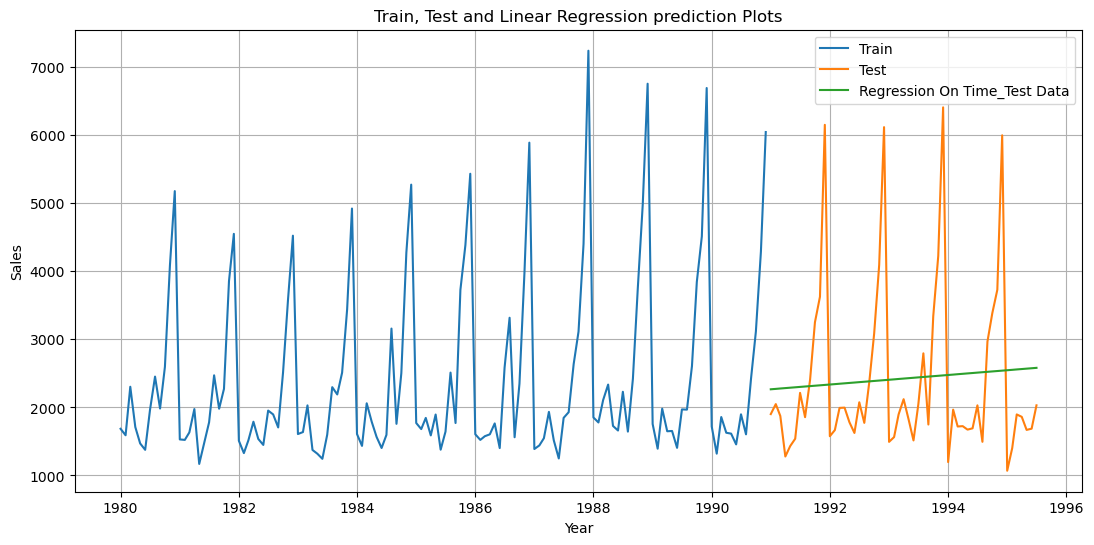

In [48]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(Sparkling_LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Train, Test and Linear Regression prediction Plots')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid();

### **II. Moving Average(MA)**

- For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

- For Moving Average, we are going to average over the entire data.

In [49]:
Sparkling_MovingAverage_train = train.copy()
Sparkling_MovingAverage_test = test.copy()

In [50]:
Sparkling_MovingAverage_train['Trailing_2'] = Sparkling_MovingAverage_train['Sparkling'].rolling(2).mean()
Sparkling_MovingAverage_train['Trailing_4'] = Sparkling_MovingAverage_train['Sparkling'].rolling(4).mean()
Sparkling_MovingAverage_train['Trailing_6'] = Sparkling_MovingAverage_train['Sparkling'].rolling(6).mean()
Sparkling_MovingAverage_train['Trailing_9'] = Sparkling_MovingAverage_train['Sparkling'].rolling(9).mean()

Sparkling_MovingAverage_train.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
1980-06-01       1377      1424.0     1716.00  1690.166667          NaN
1980-07-01       1966      1671.5     1631.50  1736.833333          NaN
1980-08-01       2453      2209.5     1816.75  1880.500000          NaN
1980-09-01       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-01       2596      2290.0     2249.75  1974.500000  1939.333333

In [51]:
Sparkling_MovingAverage_test['Trailing_2'] = Sparkling_MovingAverage_test.iloc[-2:]['Sparkling'].mean()
Sparkling_MovingAverage_test['Trailing_4'] = Sparkling_MovingAverage_test.iloc[-4:]['Sparkling'].mean()
Sparkling_MovingAverage_test['Trailing_6'] = Sparkling_MovingAverage_test.iloc[-6:]['Sparkling'].mean()
Sparkling_MovingAverage_test['Trailing_9'] = Sparkling_MovingAverage_test.iloc[-9:]['Sparkling'].mean()

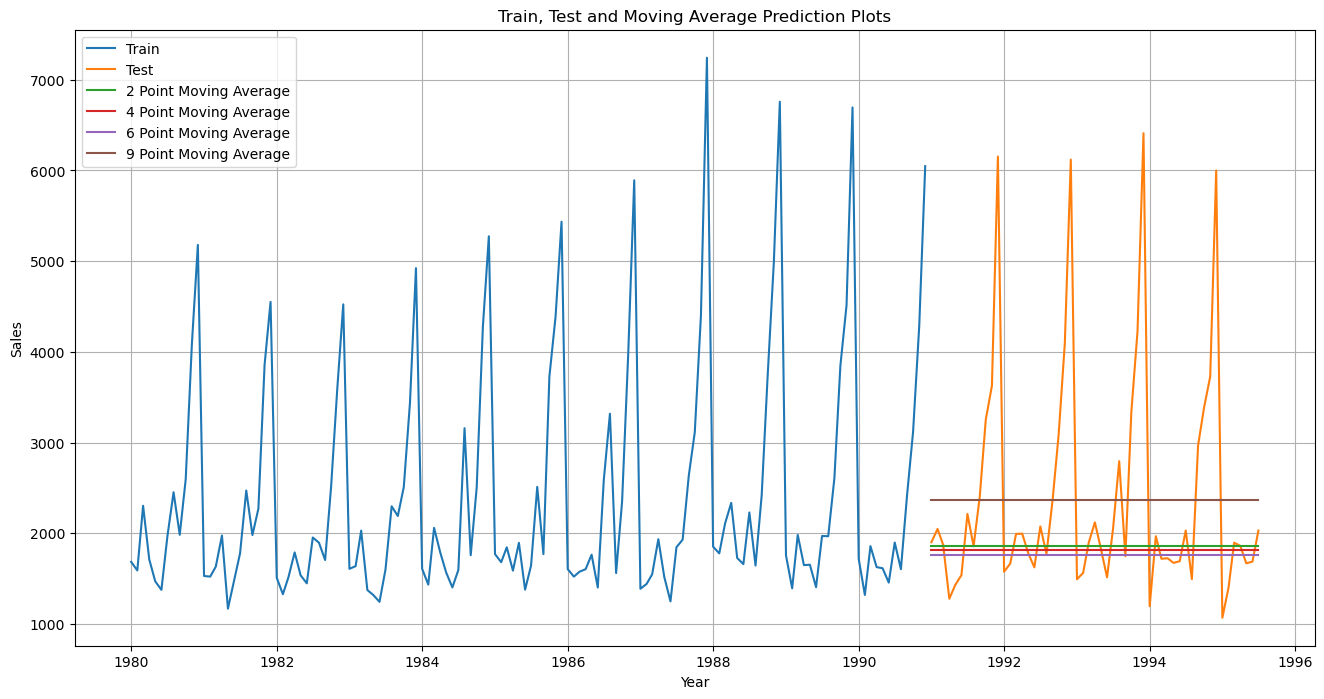

In [52]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_MovingAverage_train['Sparkling'], label='Train')
plt.plot(Sparkling_MovingAverage_test['Sparkling'], label='Test')
plt.plot(Sparkling_MovingAverage_test['Trailing_2'], label='2 Point Moving Average')
plt.plot(Sparkling_MovingAverage_test['Trailing_4'], label='4 Point Moving Average')
plt.plot(Sparkling_MovingAverage_test['Trailing_6'],label = '6 Point Moving Average')
plt.plot(Sparkling_MovingAverage_test['Trailing_9'],label = '9 Point Moving Average')
plt.title('Train, Test and Moving Average Prediction Plots')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid();

In [53]:
## Test Data - RMSE --> 2 point Trailing MA

RMSE_sparkling_model_02 = mean_squared_error(test['Sparkling'],Sparkling_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_sparkling_model_02))

## Test Data - RMSE  --> 4 point Trailing MA

RMSE_sparkling_model_03 = mean_squared_error(test['Sparkling'],Sparkling_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_sparkling_model_03))

## Test Data - RMSE --> 6 point Trailing MA

RMSE_sparkling_model_04 = mean_squared_error(test['Sparkling'],Sparkling_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_sparkling_model_04))

## Test Data - RMSE  --> 9 point Trailing MA

RMSE_sparkling_model_05 = mean_squared_error(test['Sparkling'],Sparkling_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(RMSE_sparkling_model_05))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 1384.568
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1403.450
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1427.043
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1275.362 


In [54]:
RMSE_moving_average_df = pd.DataFrame({'Test RMSE': [RMSE_sparkling_model_02,RMSE_sparkling_model_03, RMSE_sparkling_model_04, RMSE_sparkling_model_05]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

RMSE_df = pd.concat([RMSE_df, RMSE_moving_average_df])
RMSE_df

Test RMSE
Linear Regression OnTime     1275.867052
2pointTrailingMovingAverage  1384.568287
4pointTrailingMovingAverage  1403.449947
6pointTrailingMovingAverage  1427.043202
9pointTrailingMovingAverage  1275.362301

### **III. Naive Forecasts**

- For naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [55]:
Sparkling_NaiveModel_train = train.copy()
Sparkling_NaiveModel_test = test.copy()

print(Sparkling_NaiveModel_train.head())
print('\n')
print(Sparkling_NaiveModel_test.head())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471


            Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432


In [56]:
Sparkling_NaiveModel_test['naive'] = np.asarray(Sparkling_NaiveModel_train['Sparkling'])[len(np.asarray(Sparkling_NaiveModel_train['Sparkling']))-1]
Sparkling_NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

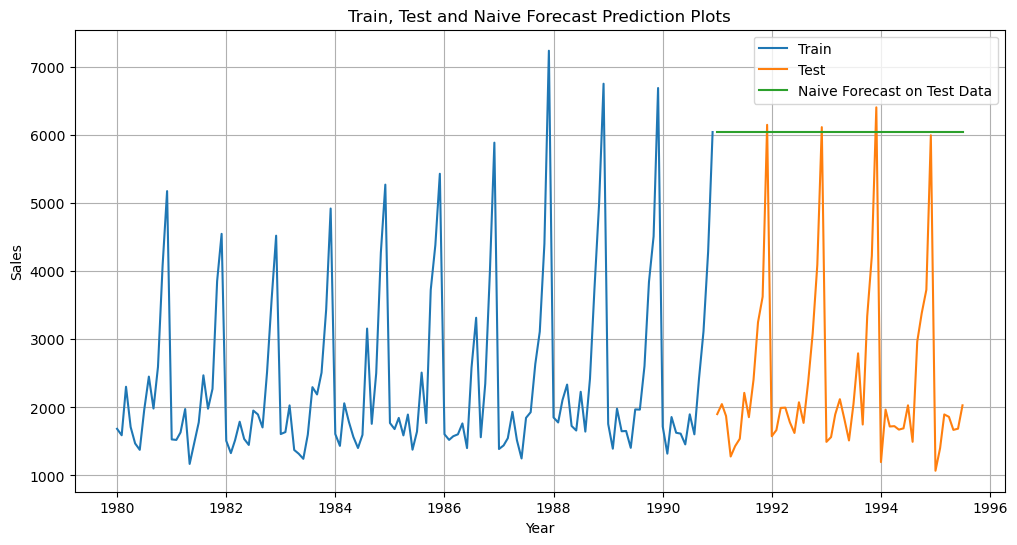

In [57]:
plt.plot(Sparkling_NaiveModel_train['Sparkling'], label='Train')
plt.plot(Sparkling_NaiveModel_test['Sparkling'], label='Test')

plt.plot(Sparkling_NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.title('Train, Test and Naive Forecast Prediction Plots')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid();

In [58]:
RMSE_sparkling_model_06 = mean_squared_error(Sparkling_NaiveModel_test['Sparkling'],Sparkling_NaiveModel_test['naive'],squared=False)
print("For Naive Approach forecast on the Test Data,  RMSE is %3.3f " %(RMSE_sparkling_model_06))

For Naive Approach forecast on the Test Data,  RMSE is 3864.279 


In [59]:
RMSE_naive_df = pd.DataFrame({'Test RMSE': [RMSE_sparkling_model_06]}
                           ,index=['Naive Approach'])

RMSE_df = pd.concat([RMSE_df, RMSE_naive_df])
RMSE_df

Test RMSE
Linear Regression OnTime     1275.867052
2pointTrailingMovingAverage  1384.568287
4pointTrailingMovingAverage  1403.449947
6pointTrailingMovingAverage  1427.043202
9pointTrailingMovingAverage  1275.362301
Naive Approach               3864.279352

### **IV. Simple Average Forecast**

- For this particular simple average method, we will forecast by using the average of the training values.

In [60]:
Sparkling_SimpleAverage_train = train.copy()
Sparkling_SimpleAverage_test = test.copy()

print(Sparkling_SimpleAverage_train.head())
print('\n')
print(Sparkling_SimpleAverage_test.head())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471


            Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432


In [61]:
Sparkling_SimpleAverage_test['mean_forecast'] = Sparkling_SimpleAverage_train['Sparkling'].mean()
Sparkling_SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

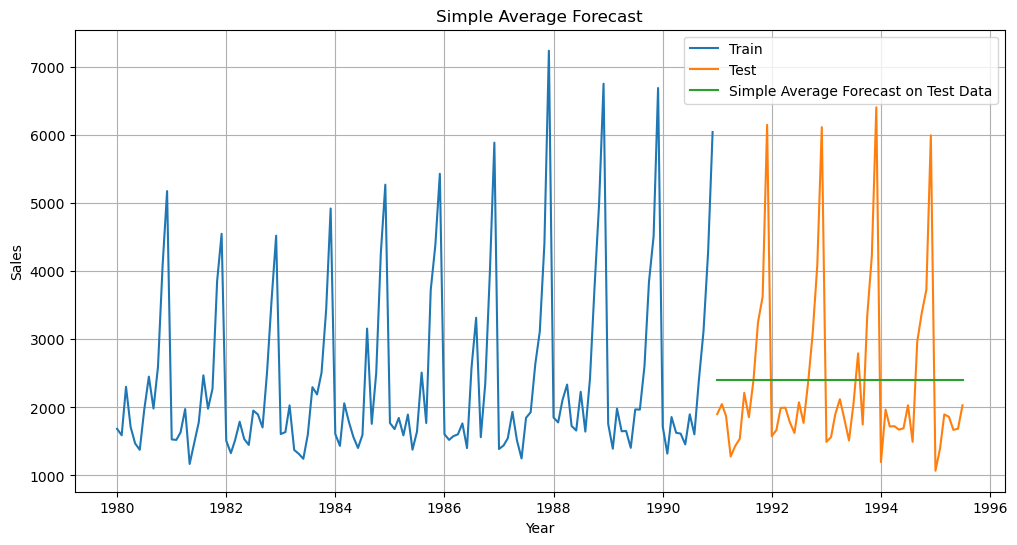

In [62]:
plt.plot(Sparkling_SimpleAverage_train['Sparkling'], label='Train')
plt.plot(Sparkling_SimpleAverage_test['Sparkling'], label='Test')

plt.plot(Sparkling_SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')
plt.title("Simple Average Forecast")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid();

In [63]:
RMSE_sparkling_model_07 = mean_squared_error(Sparkling_SimpleAverage_test['Sparkling'],Sparkling_SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f " %(RMSE_sparkling_model_07))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 


In [64]:
RMSE_SimpleAverage_df = pd.DataFrame({'Test RMSE': [RMSE_sparkling_model_07]}
                           ,index=['Simple Average Approach'])

RMSE_df = pd.concat([RMSE_df, RMSE_SimpleAverage_df])
RMSE_df

Test RMSE
Linear Regression OnTime     1275.867052
2pointTrailingMovingAverage  1384.568287
4pointTrailingMovingAverage  1403.449947
6pointTrailingMovingAverage  1427.043202
9pointTrailingMovingAverage  1275.362301
Naive Approach               3864.279352
Simple Average Approach      1275.081804

### **V. Simple Exponential Smothing**

In [65]:
Sparkling_SES_train = train.copy()
Sparkling_SES_test = test.copy()

Sparkling_SES_model = SimpleExpSmoothing(Sparkling_SES_train['Sparkling'])
Sparkling_SES_model_autofit = Sparkling_SES_model.fit(optimized=True)
print(Sparkling_SES_model_autofit.params)

{'smoothing_level': 0.04960659884563118, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1818.5047543457245, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [66]:
Sparkling_SES_test['predict'] = Sparkling_SES_model_autofit.forecast(steps=len(test))
Sparkling_SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339

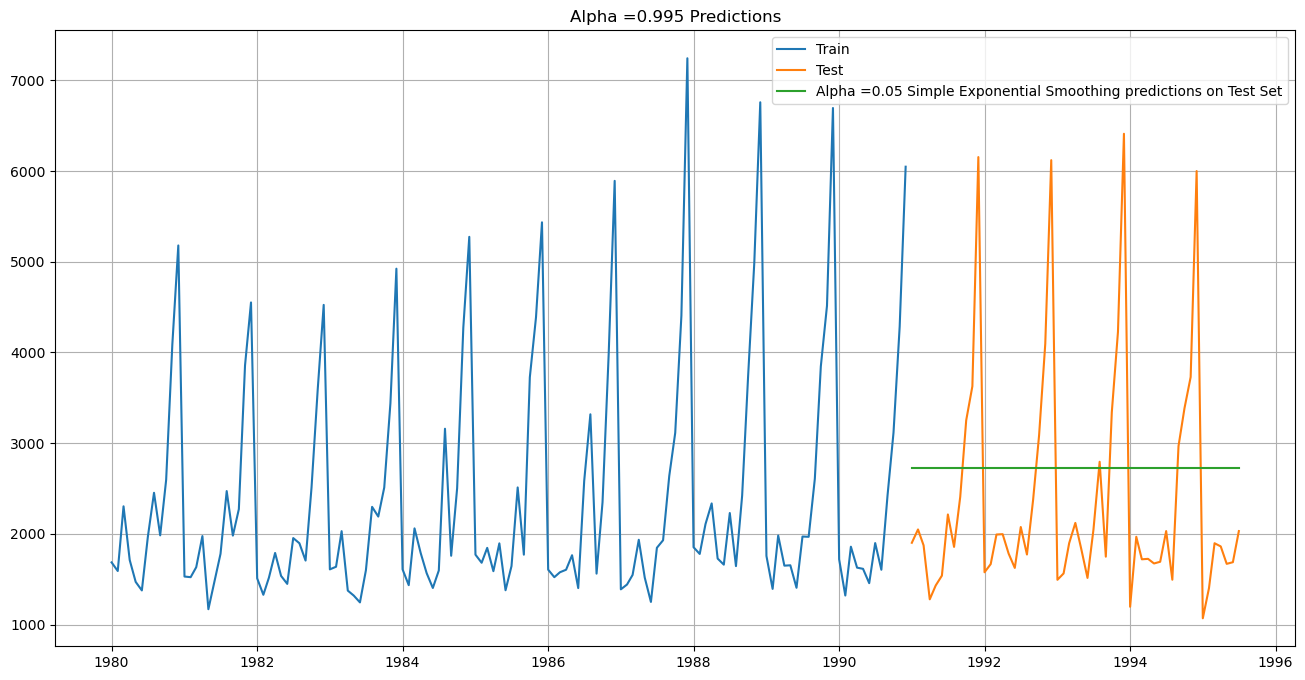

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_SES_train['Sparkling'], label='Train')
plt.plot(Sparkling_SES_test['Sparkling'], label='Test')

plt.plot(Sparkling_SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [68]:
## Test Data

RMSE_sparkling_model_08 = mean_squared_error(Sparkling_SES_test['Sparkling'],Sparkling_SES_test['predict'],squared=False)
print("For Alpha=0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(RMSE_sparkling_model_08))

For Alpha=0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [69]:
RMSE_Sparkling_SES_df = pd.DataFrame({'Test RMSE': [RMSE_sparkling_model_08]}
                           ,index=['Alpha=0.05, Simple Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Sparkling_SES_df])
RMSE_df

Test RMSE
Linear Regression OnTime                  1275.867052
2pointTrailingMovingAverage               1384.568287
4pointTrailingMovingAverage               1403.449947
6pointTrailingMovingAverage               1427.043202
9pointTrailingMovingAverage               1275.362301
Naive Approach                            3864.279352
Simple Average Approach                   1275.081804
Alpha=0.05, Simple Exponential Smoothing  1316.034674

#### Setting different alpha values.

**The higher the alpha, the more weightagefor the recent observation. That means, what happened recently will happen again.We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.**

In [70]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_SES_09 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_SES_09

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [71]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = Sparkling_SES_model.fit(smoothing_level=i,optimized=False,use_brute=True)
    Sparkling_SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    Sparkling_SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model_train_i = mean_squared_error(Sparkling_SES_train['Sparkling'],Sparkling_SES_train['predict',i],squared=False)
    
    rmse_model_test_i = mean_squared_error(Sparkling_SES_test['Sparkling'],Sparkling_SES_test['predict',i],squared=False)
    
    resultsDf_SES_09 = resultsDf_SES_09.append({'Alpha Values':i,'Train RMSE':rmse_model_train_i 
                                                ,'Test RMSE':rmse_model_test_i}, ignore_index=True)

In [72]:
resultsDf_SES_09.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

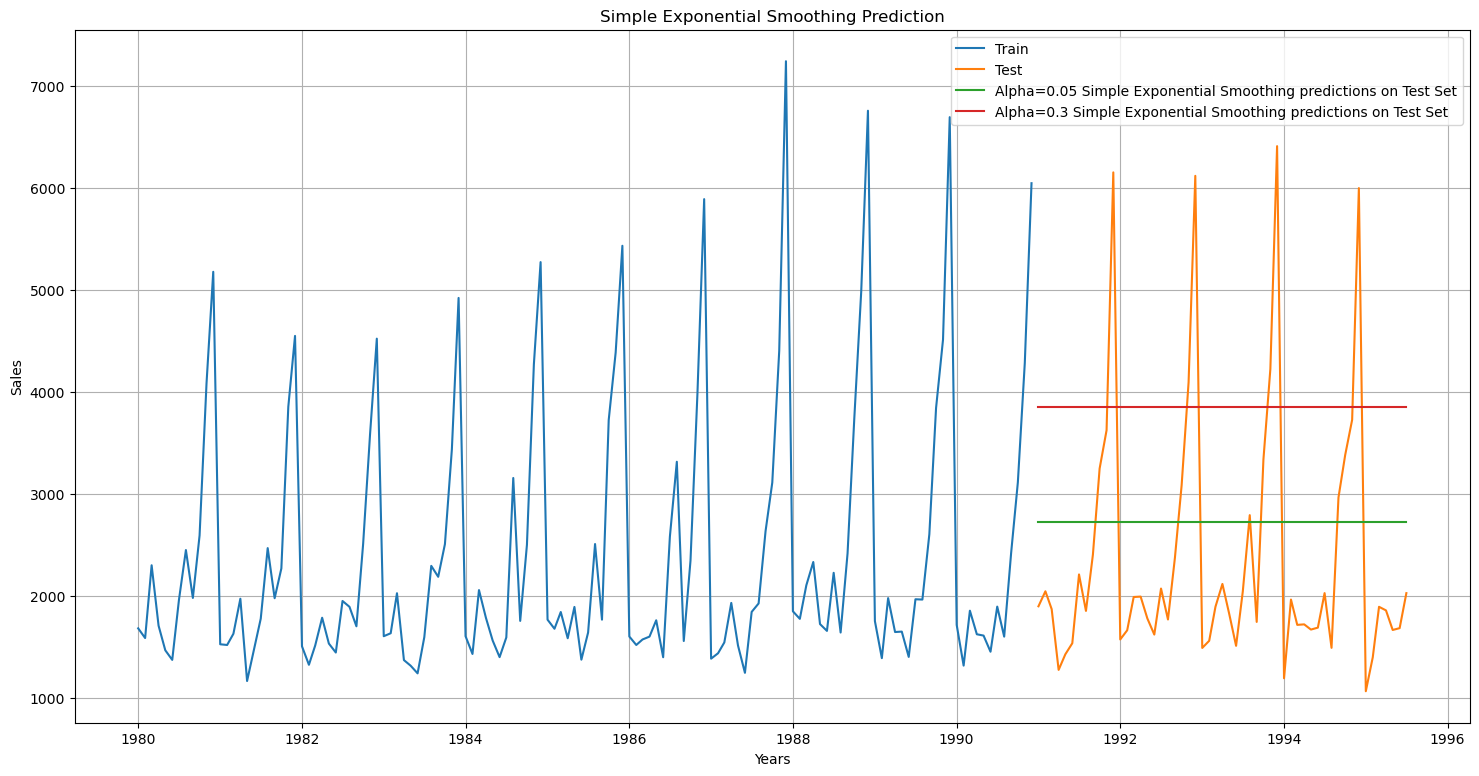

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(Sparkling_SES_train['Sparkling'], label='Train')
plt.plot(Sparkling_SES_test['Sparkling'], label='Test')

plt.plot(Sparkling_SES_test['predict'], label='Alpha=0.05 Simple Exponential Smoothing predictions on Test Set')

plt.plot(Sparkling_SES_test['predict', 0.3], label='Alpha=0.3 Simple Exponential Smoothing predictions on Test Set')
plt.title('Simple Exponential Smoothing Prediction')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid();

In [74]:
RMSE_Sparkling_SES_df = pd.DataFrame({'Test RMSE': resultsDf_SES_09.sort_values(by=['Test RMSE'],ascending=True).values[0][2]}
                           ,index=['Alpha=0.3,Simple Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Sparkling_SES_df])
RMSE_df

Test RMSE
Linear Regression OnTime                  1275.867052
2pointTrailingMovingAverage               1384.568287
4pointTrailingMovingAverage               1403.449947
6pointTrailingMovingAverage               1427.043202
9pointTrailingMovingAverage               1275.362301
Naive Approach                            3864.279352
Simple Average Approach                   1275.081804
Alpha=0.05, Simple Exponential Smoothing  1316.034674
Alpha=0.3,Simple Exponential Smoothing    1935.507132

### VI. Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [76]:
Sparkling_DES_train = train.copy()
Sparkling_DES_test = test.copy()

Sparkling_DES_model = Holt(Sparkling_DES_train['Sparkling'])
Sparkling_DES_model_autofit = Sparkling_DES_model.fit(optimized=True)
print(Sparkling_DES_model_autofit.params)

{'smoothing_level': 0.6885714285714285, 'smoothing_trend': 9.999999999999999e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1686.0, 'initial_trend': -95.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [77]:
Sparkling_DES_test['predict'] = Sparkling_DES_model_autofit.forecast(steps=len(test))
Sparkling_DES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  5221.278699
1991-02-01       2049  5127.886554
1991-03-01       1874  5034.494409
1991-04-01       1279  4941.102264
1991-05-01       1432  4847.710119

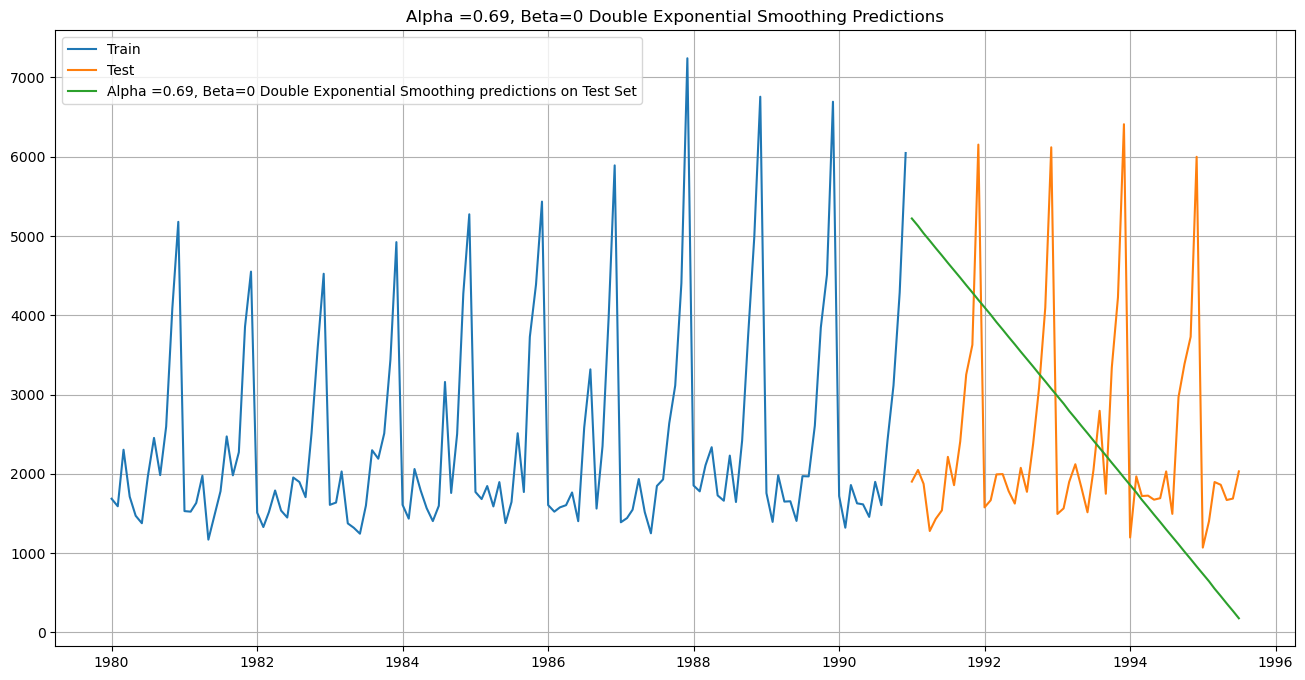

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_DES_train['Sparkling'], label='Train')
plt.plot(Sparkling_DES_test['Sparkling'], label='Test')

plt.plot(Sparkling_DES_test['predict'], label='Alpha =0.69, Beta=0 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.69, Beta=0 Double Exponential Smoothing Predictions');

In [79]:
## Test Data

RMSE_sparkling_model_10 = mean_squared_error(Sparkling_SES_test['Sparkling'],Sparkling_SES_test['predict'],squared=False)
print("For Alpha=0.69, Beta=0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(RMSE_sparkling_model_10))

For Alpha=0.69, Beta=0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [80]:
RMSE_Sparkling_DES_df = pd.DataFrame({'Test RMSE': [RMSE_sparkling_model_10]}
                           ,index=['Alpha =0.69, Beta=0, Double Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Sparkling_DES_df])
RMSE_df

Test RMSE
Linear Regression OnTime                           1275.867052
2pointTrailingMovingAverage                        1384.568287
4pointTrailingMovingAverage                        1403.449947
6pointTrailingMovingAverage                        1427.043202
9pointTrailingMovingAverage                        1275.362301
Naive Approach                                     3864.279352
Simple Average Approach                            1275.081804
Alpha=0.05, Simple Exponential Smoothing           1316.034674
Alpha=0.3,Simple Exponential Smoothing             1935.507132
Alpha =0.69, Beta=0, Double Exponential Smoothing  1316.034674

#### Setting different alpha and beta values.

**The higher the alpha, the more weightage for the recent observation. That means, what happened recently will happen again.We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.**

In [81]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_DES_11 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_DES_11

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [82]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = Sparkling_DES_model.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        Sparkling_DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        Sparkling_DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model_train_i_j = mean_squared_error(Sparkling_DES_train['Sparkling'],Sparkling_DES_train['predict',i,j],squared=False)
        
        rmse_model_test_i_j = mean_squared_error(Sparkling_DES_test['Sparkling'],Sparkling_DES_test['predict',i,j],squared=False)
        
        resultsDf_DES_11 = resultsDf_DES_11.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model_train_i_j
                                                    ,'Test RMSE':rmse_model_test_i_j}, ignore_index=True)

In [83]:
resultsDf_DES_11.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
8            0.4          0.3  1569.338606  23878.496940
1            0.3          0.4  1682.573828  26069.841401
16           0.5          0.3  1530.575845  27095.532414
24           0.6          0.3  1506.449870  29070.722592
..           ...          ...          ...           ...
39           0.7          1.0  1817.042948  57297.154185
62           1.0          0.9  1985.368445  57823.177011
47           0.8          1.0  1872.711054  57990.117908
55           0.9          1.0  1948.020916  59008.254331
63           1.0          1.0  2077.672157  59877.076519

[64 rows x 4 columns]

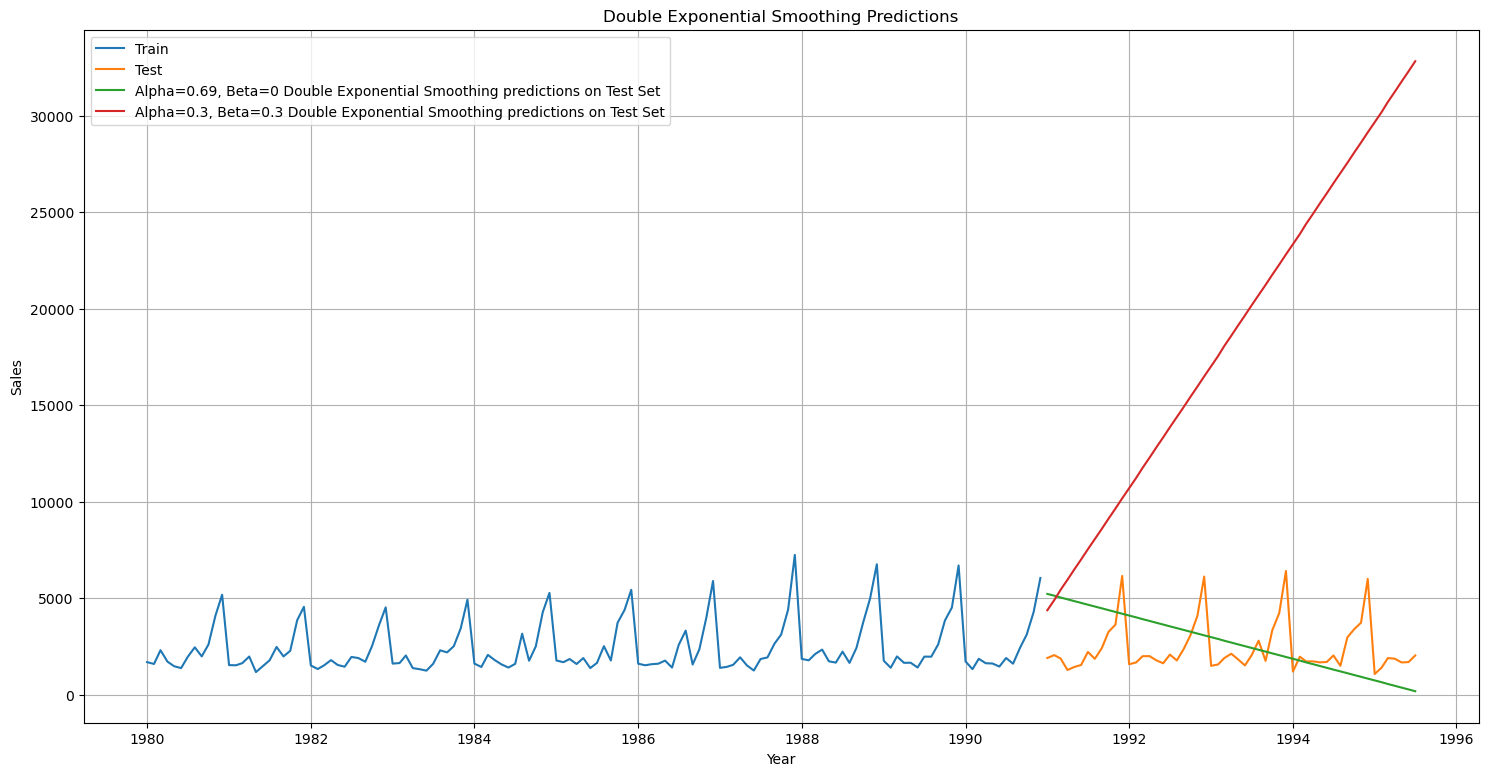

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(Sparkling_DES_train['Sparkling'], label='Train')
plt.plot(Sparkling_DES_test['Sparkling'], label='Test')

plt.plot(Sparkling_DES_test['predict'], label='Alpha=0.69, Beta=0 Double Exponential Smoothing predictions on Test Set')

plt.plot(Sparkling_DES_test['predict', 0.3, 0.3], label='Alpha=0.3, Beta=0.3 Double Exponential Smoothing predictions on Test Set')
plt.title('Double Exponential Smoothing Predictions');
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid();

In [85]:
RMSE_Sparkling_DES_df = pd.DataFrame({'Test RMSE': resultsDf_DES_11.sort_values(by=['Test RMSE'],ascending=True).values[0][3]}
                           ,index=['Alpha=0.3, Beta=0.3, Double Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Sparkling_DES_df])
RMSE_df

Test RMSE
Linear Regression OnTime                            1275.867052
2pointTrailingMovingAverage                         1384.568287
4pointTrailingMovingAverage                         1403.449947
6pointTrailingMovingAverage                         1427.043202
9pointTrailingMovingAverage                         1275.362301
Naive Approach                                      3864.279352
Simple Average Approach                             1275.081804
Alpha=0.05, Simple Exponential Smoothing            1316.034674
Alpha=0.3,Simple Exponential Smoothing              1935.507132
Alpha =0.69, Beta=0, Double Exponential Smoothing   1316.034674
Alpha=0.3, Beta=0.3, Double Exponential Smoothing  18259.110704

### VII. Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [86]:
Sparkling_TES_train = train.copy()
Sparkling_TES_test = test.copy()

Sparkling_TES_model = ExponentialSmoothing(Sparkling_TES_train['Sparkling'],trend='additive',seasonal='multiplicative')
Sparkling_TES_model_autofit = Sparkling_TES_model.fit()
print(Sparkling_TES_model_autofit.params)

{'smoothing_level': 0.11194572287706502, 'smoothing_trend': 0.04979454913988668, 'smoothing_seasonal': 0.3616765678435302, 'damping_trend': nan, 'initial_level': 2356.340229937152, 'initial_trend': -10.519480221963526, 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
       0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
       1.8820382 , 2.38194187]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [87]:
Sparkling_TES_test['predict'] = Sparkling_TES_model_autofit.forecast(steps=len(test))
Sparkling_TES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  1586.782642
1991-02-01       2049  1355.896477
1991-03-01       1874  1762.095344
1991-04-01       1279  1655.471900
1991-05-01       1432  1541.320914

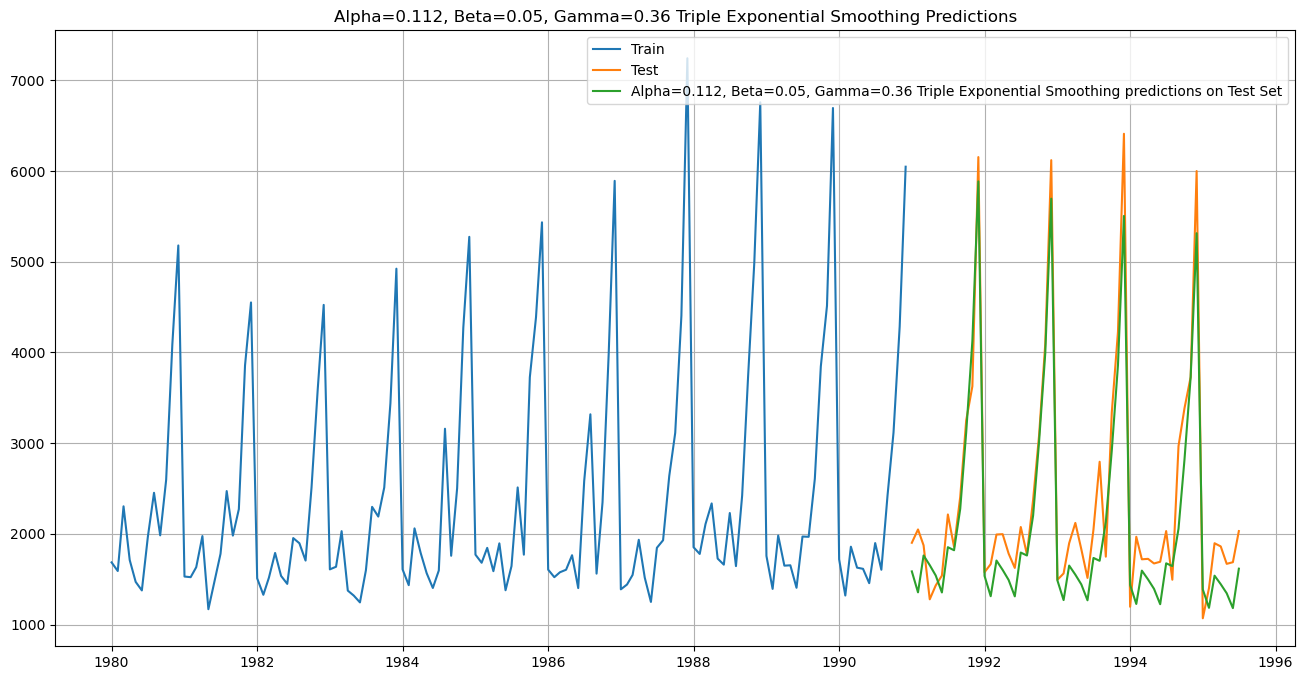

In [88]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Sparkling_TES_train['Sparkling'], label='Train')
plt.plot(Sparkling_TES_test['Sparkling'], label='Test')

plt.plot(Sparkling_TES_test['predict'], label='Alpha=0.112, Beta=0.05, Gamma=0.36 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.112, Beta=0.05, Gamma=0.36 Triple Exponential Smoothing Predictions');

In [89]:
## Test Data

RMSE_sparkling_model_12 = mean_squared_error(Sparkling_TES_test['Sparkling'],Sparkling_TES_test['predict'],squared=False)
print("For Alpha=0.112, Beta=0.05, Gamma=0.36 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(RMSE_sparkling_model_10))

For Alpha=0.112, Beta=0.05, Gamma=0.36 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [90]:
RMSE_Sparkling_TES_df = pd.DataFrame({'Test RMSE': [RMSE_sparkling_model_12]}
                           ,index=['Alpha=0.112, Beta=0.05, Gamma=0.36, Triple Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Sparkling_TES_df])
RMSE_df

Test RMSE
Linear Regression OnTime                             1275.867052
2pointTrailingMovingAverage                          1384.568287
4pointTrailingMovingAverage                          1403.449947
6pointTrailingMovingAverage                          1427.043202
9pointTrailingMovingAverage                          1275.362301
Naive Approach                                       3864.279352
Simple Average Approach                              1275.081804
Alpha=0.05, Simple Exponential Smoothing             1316.034674
Alpha=0.3,Simple Exponential Smoothing               1935.507132
Alpha =0.69, Beta=0, Double Exponential Smoothing    1316.034674
Alpha=0.3, Beta=0.3, Double Exponential Smoothing   18259.110704
Alpha=0.112, Beta=0.05, Gamma=0.36, Triple Expo...    406.510170

#### Setting different alpha and beta values.

**The higher the alpha, the more weightage for the recent observation. That means, what happened recently will happen again.We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.**

In [91]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_TES_13 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_TES_13

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [92]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = Sparkling_TES_model.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, 
                                                       optimized=False, use_brute=True)
            Sparkling_TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            Sparkling_TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            
            rmse_model_train_i_j_k = mean_squared_error(Sparkling_TES_train['Sparkling'],Sparkling_TES_train['predict',i,j,k],squared=False)
            
            rmse_model_test_i_j_k = mean_squared_error(Sparkling_TES_test['Sparkling'],Sparkling_TES_test['predict',i,j,k],squared=False)
            
            resultsDf_TES_13 = resultsDf_TES_13.append({'Alpha Values':i,'Beta Values':j, 'Gamma Values': k,
                                                        'Train RMSE':rmse_model_train_i_j_k
                                                        ,'Test RMSE':rmse_model_test_i_j_k}, ignore_index=True)

In [93]:
resultsDf_TES_13.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0             0.3          0.3           0.3  3.977973e+02  3.613973e+02
17            0.3          0.5           0.4  4.528014e+02  5.125426e+02
376           0.8          1.0           0.3  7.907407e+02  5.802661e+02
66            0.4          0.3           0.5  4.486613e+02  5.921531e+02
8             0.3          0.4           0.3  4.151721e+02  6.051105e+02
..            ...          ...           ...           ...           ...
406           0.9          0.5           0.9  6.346125e+03  7.893556e+06
508           1.0          1.0           0.7  2.660015e+05  8.649577e+06
373           0.8          0.9           0.8  1.894002e+06  9.023204e+06
474           1.0          0.6           0.5  5.298638e+03  1.016607e+07
159           0.5          0.6           1.0  7.880631e+03  2.102770e+07

[512 rows x 5 columns]

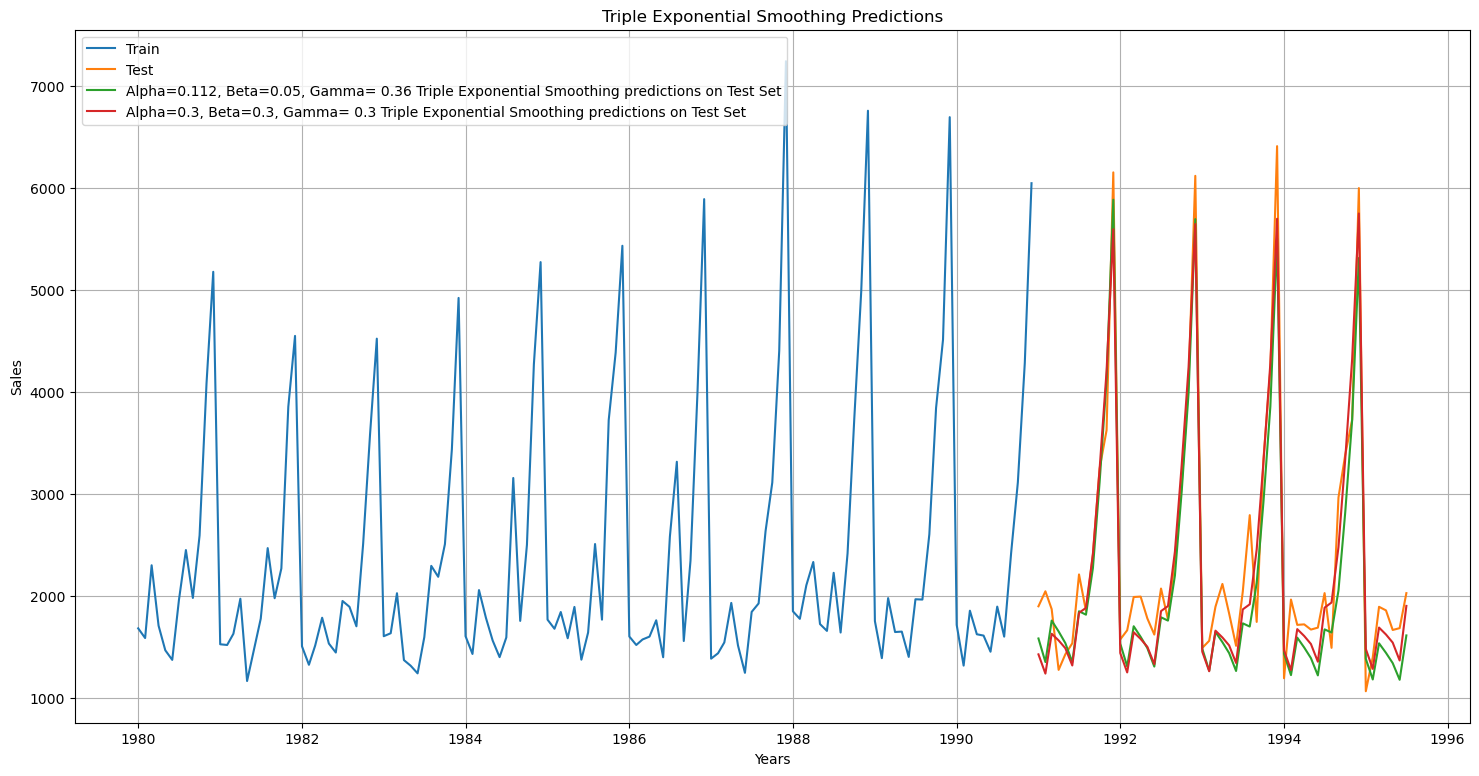

In [94]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(Sparkling_TES_train['Sparkling'], label='Train')
plt.plot(Sparkling_TES_test['Sparkling'], label='Test')

plt.plot(Sparkling_TES_test['predict'], label='Alpha=0.112, Beta=0.05, Gamma= 0.36 Triple Exponential Smoothing predictions on Test Set')

plt.plot(Sparkling_TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3, Beta=0.3, Gamma= 0.3 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid();

In [95]:
RMSE_Sparkling_TES_df = pd.DataFrame({'Test RMSE': resultsDf_TES_13.sort_values(by=['Test RMSE'],ascending=True).values[0][4]}
                           ,index=['Alpha=0.3, Beta=0.3, Gamma=0.3, Triple Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Sparkling_TES_df])
RMSE_df

Test RMSE
Linear Regression OnTime                             1275.867052
2pointTrailingMovingAverage                          1384.568287
4pointTrailingMovingAverage                          1403.449947
6pointTrailingMovingAverage                          1427.043202
9pointTrailingMovingAverage                          1275.362301
Naive Approach                                       3864.279352
Simple Average Approach                              1275.081804
Alpha=0.05, Simple Exponential Smoothing             1316.034674
Alpha=0.3,Simple Exponential Smoothing               1935.507132
Alpha =0.69, Beta=0, Double Exponential Smoothing    1316.034674
Alpha=0.3, Beta=0.3, Double Exponential Smoothing   18259.110704
Alpha=0.112, Beta=0.05, Gamma=0.36, Triple Expo...    406.510170
Alpha=0.3, Beta=0.3, Gamma=0.3, Triple Exponent...    361.397300

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

**So if p-value < 0.05 then null hypothesis is rejected: It implies that Time Series is Stationary.**


**If p-value > 0.05 then null hypothesis can't be rejected: It implies that Time Series is non Stationary.**

In [96]:
## Test for stationarity of the series - Dicky Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

#### I. Test of Stationary for complete dataset

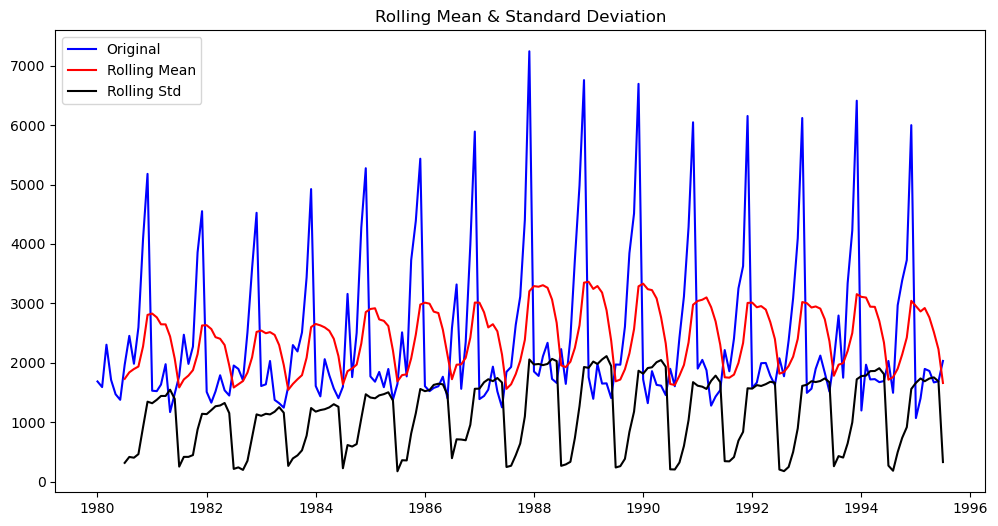

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [97]:
test_stationarity(treated_sparkling_df['Sparkling'])

**Since p-value of 0.601 > 0.05. At significant level of 0.05, the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**

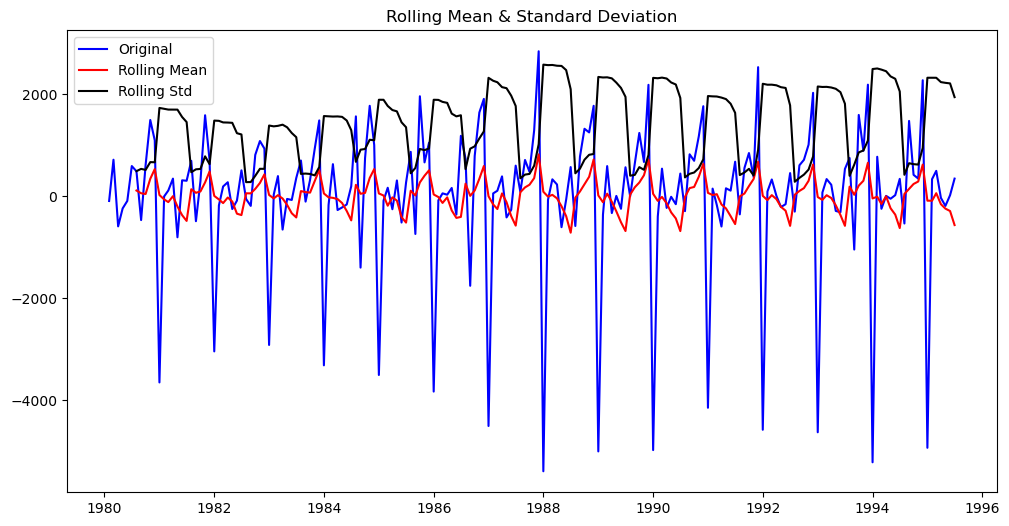

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [98]:
test_stationarity(treated_sparkling_df['Sparkling'].diff().dropna())

**With a difference of order 1 and p-value is less than significance level of 0.05, the Time Series is stationary.**

**We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.**

#### II. Test of Stationary for Train dataset

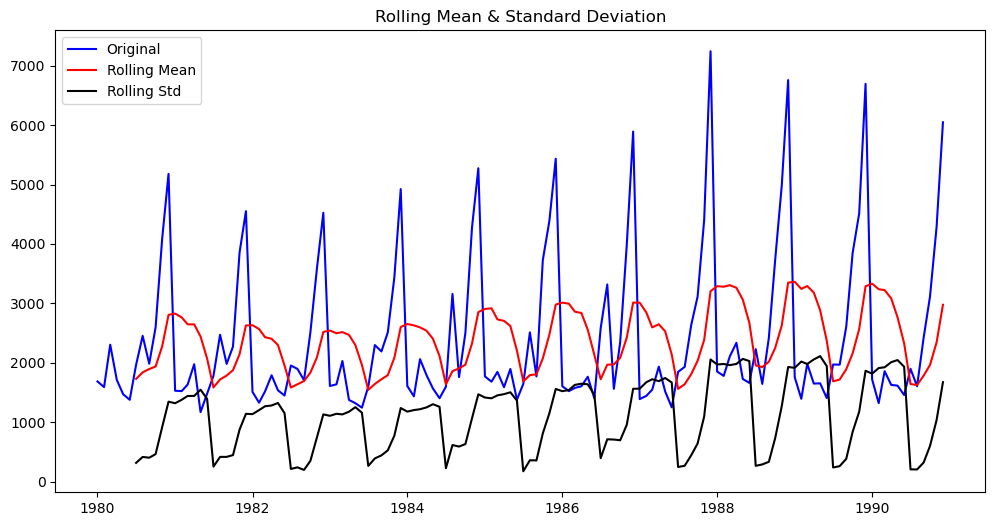

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [99]:
test_stationarity(train['Sparkling'])

**Since p-value of 0.66 > 0.05. At significant level of 0.05, the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**

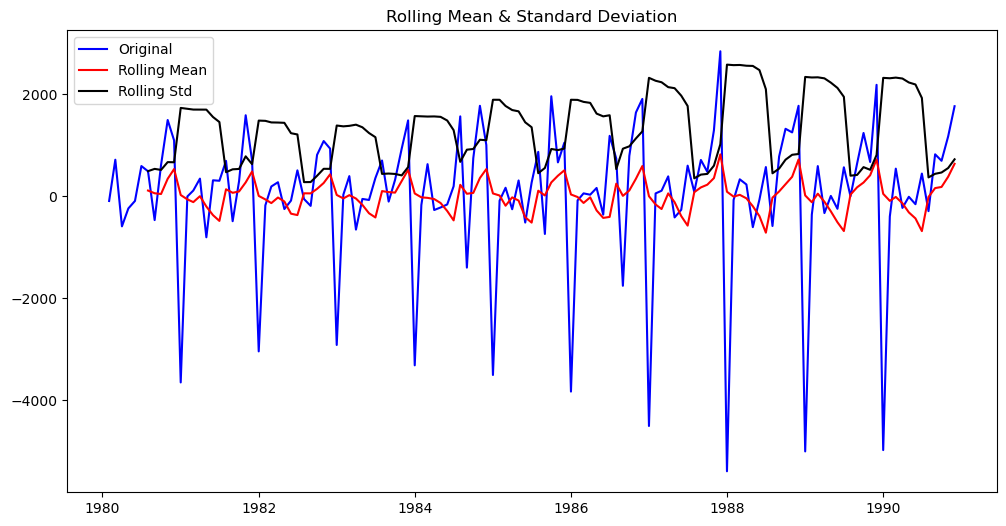

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [100]:
test_stationarity(train['Sparkling'].diff().dropna())

In [101]:
train['Sparkling'].diff().dropna().var()

1913244.3459776868

**With a difference of order 1 and p-value is less than significance level of 0.05, the Time Series is stationary.**

**We see that after taking a difference of order 1 the series have become stationary.**

### Plot the Autocorrelation function plots on the whole data.

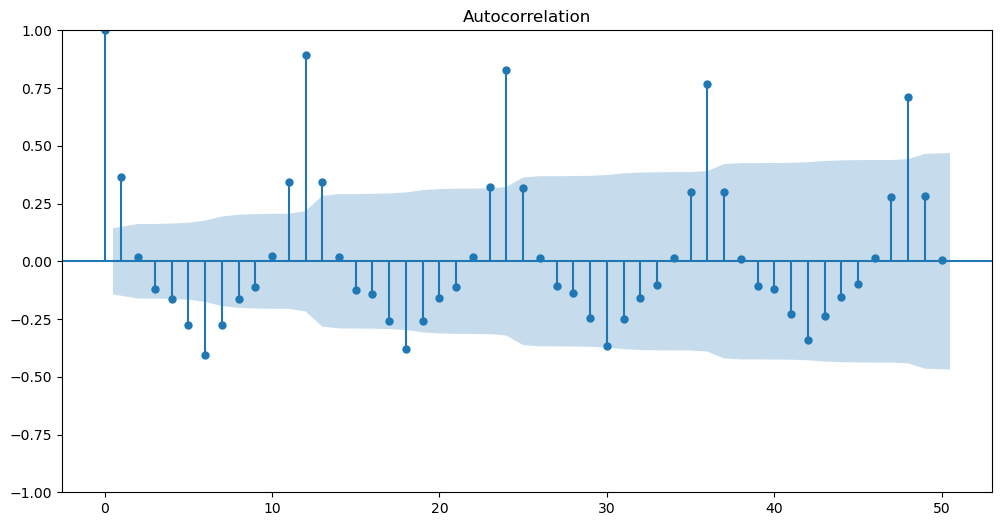

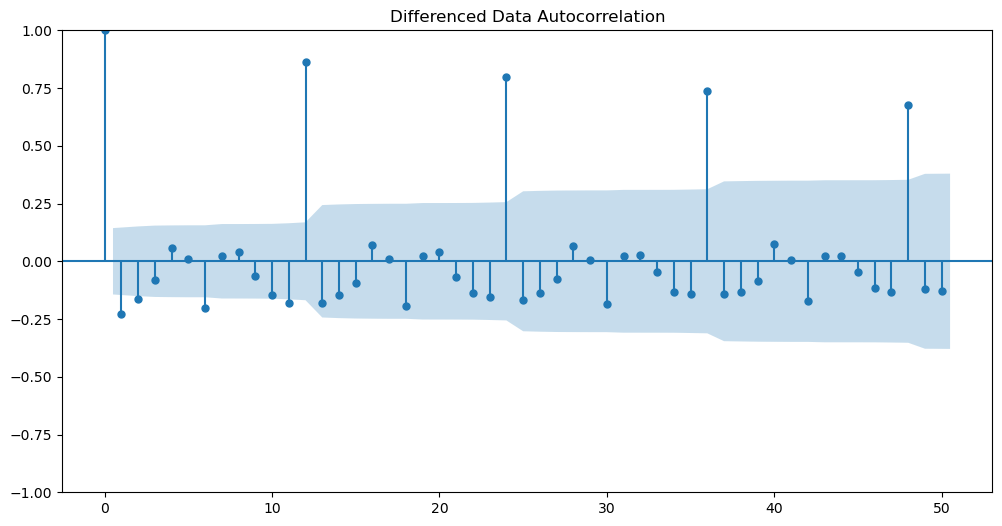

In [102]:
plot_acf(treated_sparkling_df['Sparkling'],lags=50)
plot_acf(treated_sparkling_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

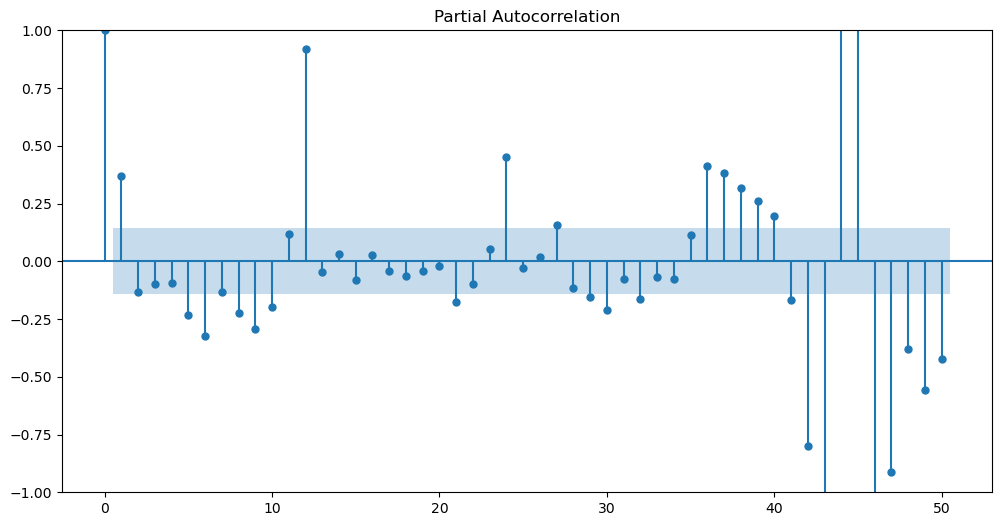

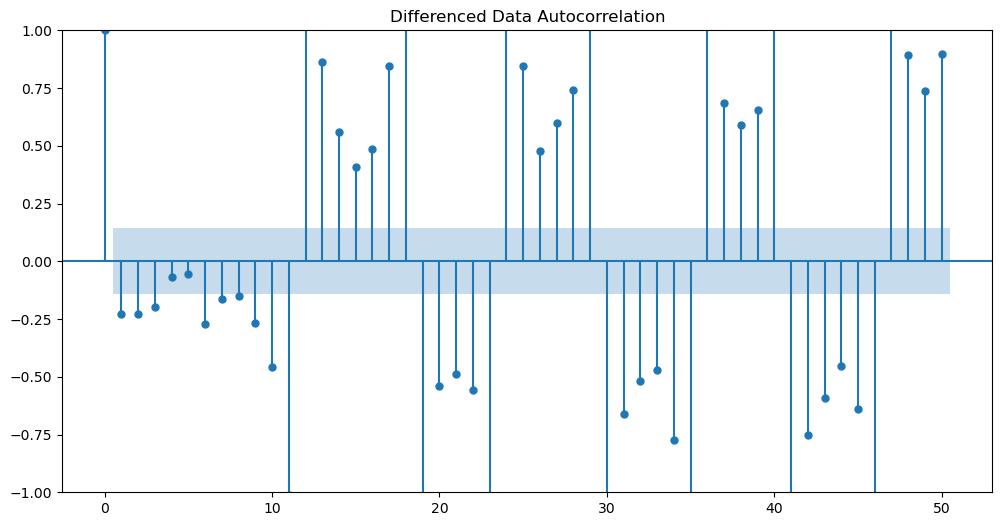

In [103]:
plot_pacf(treated_sparkling_df['Sparkling'],lags=50)
plot_pacf(treated_sparkling_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

- **ACF Plots gives value of 2, it implies q=2 will be suitable for model**

- **PACF Plots gives value of 3, it implies p=3 will be suitable for model**

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### I.ARIMA

In [104]:
Sparkling_ARIMA_train = train.copy()
Sparkling_ARIMA_test = test.copy()

In [105]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 4)
d= range(1,3)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 2, 0)
Model: (0, 2, 1)
Model: (0, 2, 2)
Model: (0, 2, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 2, 0)
Model: (1, 2, 1)
Model: (1, 2, 2)
Model: (1, 2, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 2, 0)
Model: (2, 2, 1)
Model: (2, 2, 2)
Model: (2, 2, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 2, 0)
Model: (3, 2, 1)
Model: (3, 2, 2)
Model: (3, 2, 3)


In [106]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [107]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Sparkling_ARIMA_train,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(0, 1, 3) - AIC:2233.994857759709
ARIMA(0, 2, 0) - AIC:2359.0607820548216
ARIMA(0, 2, 1) - AIC:2257.515942823697
ARIMA(0, 2, 2) - AIC:2253.5951289115737
ARIMA(0, 2, 3) - AIC:2227.7956611511777
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404
ARIMA(1, 1, 2) - AIC:2234.527200452325
ARIMA(1, 1, 3) - AIC:2235.6078121797555
ARIMA(1, 2, 0) - AIC:2328.281278254848
ARIMA(1, 2, 1) - AIC:2256.7173169217185
ARIMA(1, 2, 2) - AIC:2228.0434576115567
ARIMA(1, 2, 3) - AIC:2226.8246188024773
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.509212607011
ARIMA(2, 1, 3) - AIC:2232.984188147608
ARIMA(2, 2, 0) - AIC:2308.2230341456648
ARIMA(2, 2, 1) - AIC:2250.739604163092
ARIMA(2, 2, 2) - AIC:2227.3442862320394
ARIMA(2, 2, 3) - AIC:2253.0164398316024
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 

In [108]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
18  (2, 1, 2)  2213.509213
27  (3, 1, 3)  2221.451354
15  (1, 2, 3)  2226.824619
22  (2, 2, 2)  2227.344286
7   (0, 2, 3)  2227.795661
14  (1, 2, 2)  2228.043458
26  (3, 1, 2)  2230.771491
19  (2, 1, 3)  2232.984188
17  (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
10  (1, 1, 2)  2234.527200
25  (3, 1, 1)  2235.498607
11  (1, 1, 3)  2235.607812
9   (1, 1, 1)  2235.755095
31  (3, 2, 3)  2238.188051
29  (3, 2, 1)  2248.448400
30  (3, 2, 2)  2248.554301
21  (2, 2, 1)  2250.739604
23  (2, 2, 3)  2253.016440
6   (0, 2, 2)  2253.595129
13  (1, 2, 1)  2256.717317
5   (0, 2, 1)  2257.515943
24  (3, 1, 0)  2257.723379
16  (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
8   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036
28  (3, 2, 0)  2285.476543
20  (2, 2, 0)  2308.223034
12  (1, 2, 0)  2328.281278
4   (0, 2, 0)  2359.060782

In [109]:
auto_ARIMA = ARIMA(Sparkling_ARIMA_train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 03 Sep 2023   AIC                           2213.509
Time:                        23:28:31   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

In [110]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

Sparkling_RMSE_ARIMA = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(Sparkling_RMSE_ARIMA)

1299.9798294740397


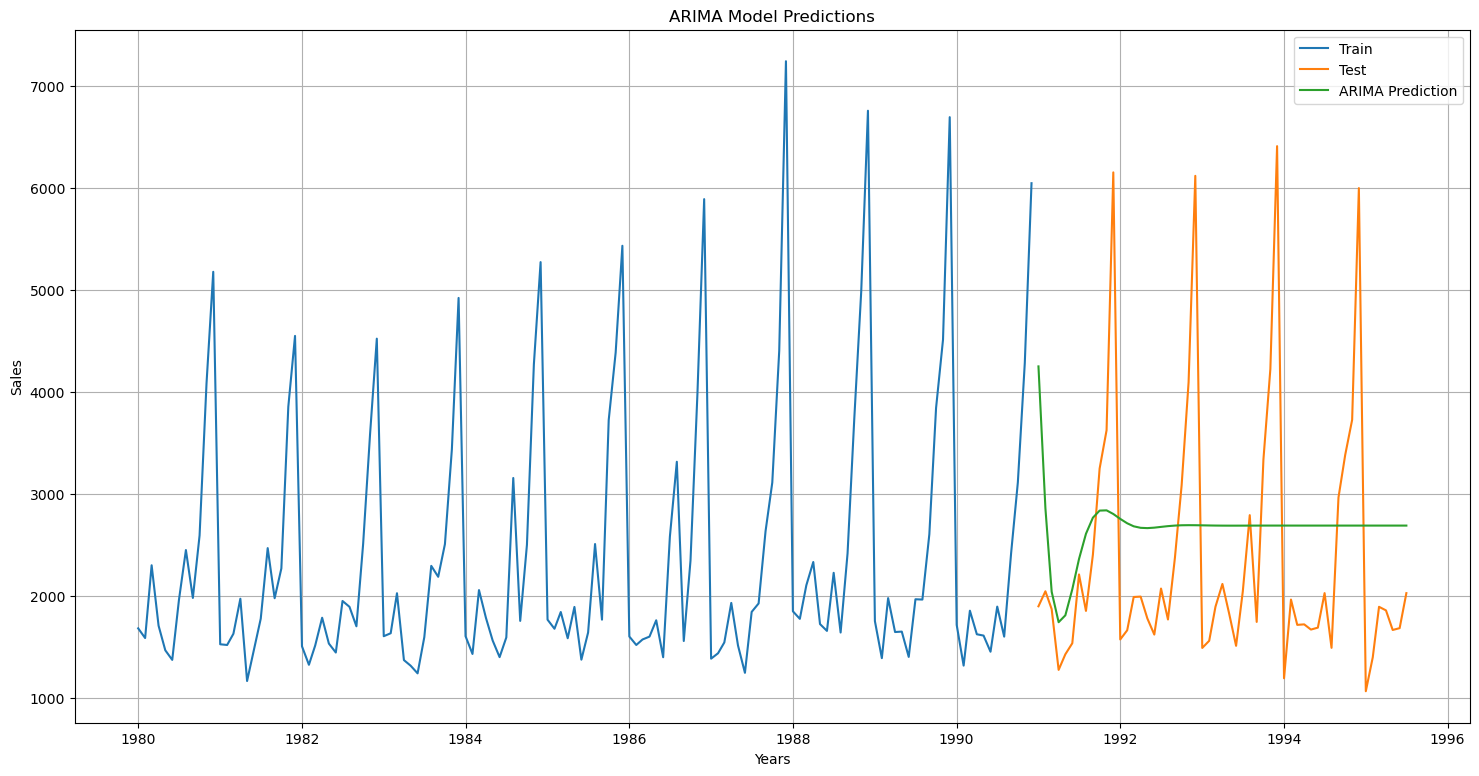

In [112]:
plt.figure(figsize=(18,9))
plt.plot(Sparkling_ARIMA_train['Sparkling'], label='Train')
plt.plot(Sparkling_ARIMA_test['Sparkling'], label='Test')

plt.plot(predicted_auto_ARIMA, label='ARIMA Prediction')

plt.legend(loc='best')
plt.title('ARIMA Model Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid();

In [111]:
RMSE_Sparkling_ARIMA_df = pd.DataFrame({'Test RMSE': Sparkling_RMSE_ARIMA}
                           ,index=['ARIMA Model (2,1,2)'])

RMSE_df = pd.concat([RMSE_df, RMSE_Sparkling_ARIMA_df])
RMSE_df

Test RMSE
Linear Regression OnTime                             1275.867052
2pointTrailingMovingAverage                          1384.568287
4pointTrailingMovingAverage                          1403.449947
6pointTrailingMovingAverage                          1427.043202
9pointTrailingMovingAverage                          1275.362301
Naive Approach                                       3864.279352
Simple Average Approach                              1275.081804
Alpha=0.05, Simple Exponential Smoothing             1316.034674
Alpha=0.3,Simple Exponential Smoothing               1935.507132
Alpha =0.69, Beta=0, Double Exponential Smoothing    1316.034674
Alpha=0.3, Beta=0.3, Double Exponential Smoothing   18259.110704
Alpha=0.112, Beta=0.05, Gamma=0.36, Triple Expo...    406.510170
Alpha=0.3, Beta=0.3, Gamma=0.3, Triple Exponent...    361.397300
ARIMA Model (2,1,2)                                  1299.979829

### II. SARIMA

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

**We see that there can be a seasonality of 12.**

In [113]:
Sparkling_SARIMA_train = train.copy()
Sparkling_SARIMA_test = test.copy()

In [114]:
import itertools

p = range(3,5)
q = range(2,4)
d= range(1,2)
D = range(1,2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    for j in range(1, len(model_pdq)):
        print('Model: {}{}'.format(pdq[i], model_pdq[j]))

Examples of some parameter combinations for Model...
Model: (3, 1, 3)(3, 1, 3, 12)
Model: (3, 1, 3)(4, 1, 2, 12)
Model: (3, 1, 3)(4, 1, 3, 12)
Model: (4, 1, 2)(3, 1, 3, 12)
Model: (4, 1, 2)(4, 1, 2, 12)
Model: (4, 1, 2)(4, 1, 3, 12)
Model: (4, 1, 3)(3, 1, 3, 12)
Model: (4, 1, 3)(4, 1, 2, 12)
Model: (4, 1, 3)(4, 1, 3, 12)


In [115]:
len(pdq) * len(model_pdq)

16

In [116]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [117]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Sparkling_SARIMA_train['Sparkling'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:1219.325778934333
SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:5100.51604439758
SARIMA(3, 1, 2)x(4, 1, 2, 12) - AIC:1039.3192708933382
SARIMA(3, 1, 2)x(4, 1, 3, 12) - AIC:5240.3201090886205
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:1216.4866147216462
SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:26.0
SARIMA(3, 1, 3)x(4, 1, 2, 12) - AIC:1044.0691932051861
SARIMA(3, 1, 3)x(4, 1, 3, 12) - AIC:5022.926082300661
SARIMA(4, 1, 2)x(3, 1, 2, 12) - AIC:1207.5922931533457
SARIMA(4, 1, 2)x(3, 1, 3, 12) - AIC:1011.8536284036311
SARIMA(4, 1, 2)x(4, 1, 2, 12) - AIC:1028.7764685134698
SARIMA(4, 1, 2)x(4, 1, 3, 12) - AIC:5166.388638637873
SARIMA(4, 1, 3)x(3, 1, 2, 12) - AIC:1208.0052839737623
SARIMA(4, 1, 3)x(3, 1, 3, 12) - AIC:4520.223905598858
SARIMA(4, 1, 3)x(4, 1, 2, 12) - AIC:1029.7049777428201
SARIMA(4, 1, 3)x(4, 1, 3, 12) - AIC:3781.9556052451117


In [118]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

param       seasonal          AIC
5   (3, 1, 3)  (3, 1, 3, 12)    26.000000
9   (4, 1, 2)  (3, 1, 3, 12)  1011.853628
10  (4, 1, 2)  (4, 1, 2, 12)  1028.776469
14  (4, 1, 3)  (4, 1, 2, 12)  1029.704978
2   (3, 1, 2)  (4, 1, 2, 12)  1039.319271
6   (3, 1, 3)  (4, 1, 2, 12)  1044.069193
8   (4, 1, 2)  (3, 1, 2, 12)  1207.592293
12  (4, 1, 3)  (3, 1, 2, 12)  1208.005284
4   (3, 1, 3)  (3, 1, 2, 12)  1216.486615
0   (3, 1, 2)  (3, 1, 2, 12)  1219.325779

In [119]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(Sparkling_SARIMA_train['Sparkling'],
                                order=(3, 1, 2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit()
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -598.663
Date:                            Sun, 03 Sep 2023   AIC                           1219.326
Time:                                    23:34:18   BIC                           1245.528
Sample:                                01-01-1980   HQIC                          1229.831
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7381      0.158     -4.676      0.000      -1.048      -0.429
ar.L2          0.1386      0.181   

In [120]:
predicted_auto_SARIMA = results_auto_SARIMA.forecast(steps=len(test))

Sparkling_RMSE_SARIMA = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA,squared=False)
print(Sparkling_RMSE_SARIMA)

327.3891826455624


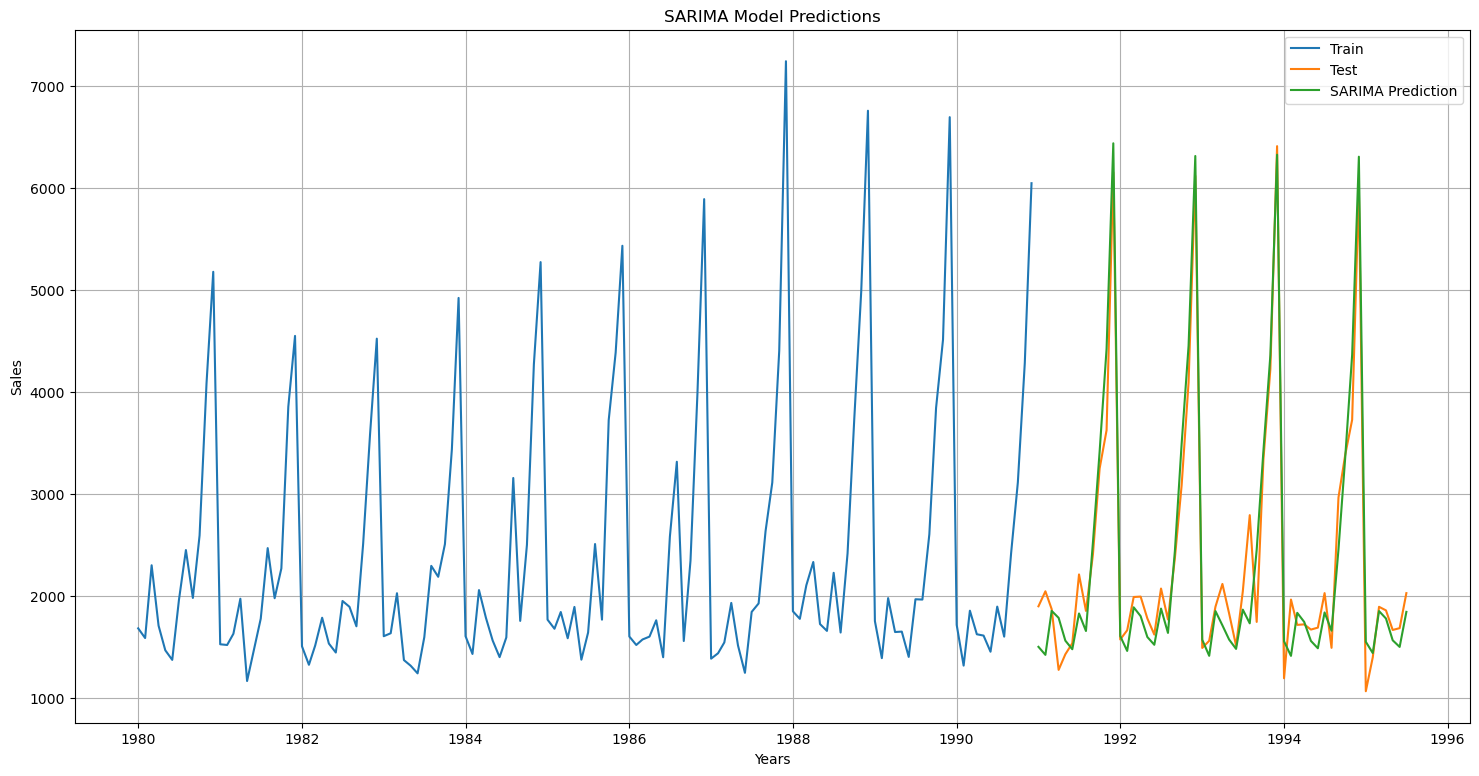

In [121]:
plt.figure(figsize=(18,9))
plt.plot(Sparkling_SARIMA_train['Sparkling'], label='Train')
plt.plot(Sparkling_SARIMA_test['Sparkling'], label='Test')

plt.plot(predicted_auto_SARIMA, label='SARIMA Prediction')

plt.legend(loc='best')
plt.title('SARIMA Model Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid();

In [122]:
RMSE_Sparkling_SARIMA_df = pd.DataFrame({'Test RMSE': Sparkling_RMSE_SARIMA}
                           ,index=['SARIMA Model (3, 1, 2)x(3, 1, 2, 12)'])

RMSE_df = pd.concat([RMSE_df, RMSE_Sparkling_SARIMA_df])
RMSE_df

Test RMSE
Linear Regression OnTime                             1275.867052
2pointTrailingMovingAverage                          1384.568287
4pointTrailingMovingAverage                          1403.449947
6pointTrailingMovingAverage                          1427.043202
9pointTrailingMovingAverage                          1275.362301
Naive Approach                                       3864.279352
Simple Average Approach                              1275.081804
Alpha=0.05, Simple Exponential Smoothing             1316.034674
Alpha=0.3,Simple Exponential Smoothing               1935.507132
Alpha =0.69, Beta=0, Double Exponential Smoothing    1316.034674
Alpha=0.3, Beta=0.3, Double Exponential Smoothing   18259.110704
Alpha=0.112, Beta=0.05, Gamma=0.36, Triple Expo...    406.510170
Alpha=0.3, Beta=0.3, Gamma=0.3, Triple Exponent...    361.397300
ARIMA Model (2,1,2)                                  1299.979829
SARIMA Model (3, 1, 2)x(3, 1, 2, 12)                  327.389183

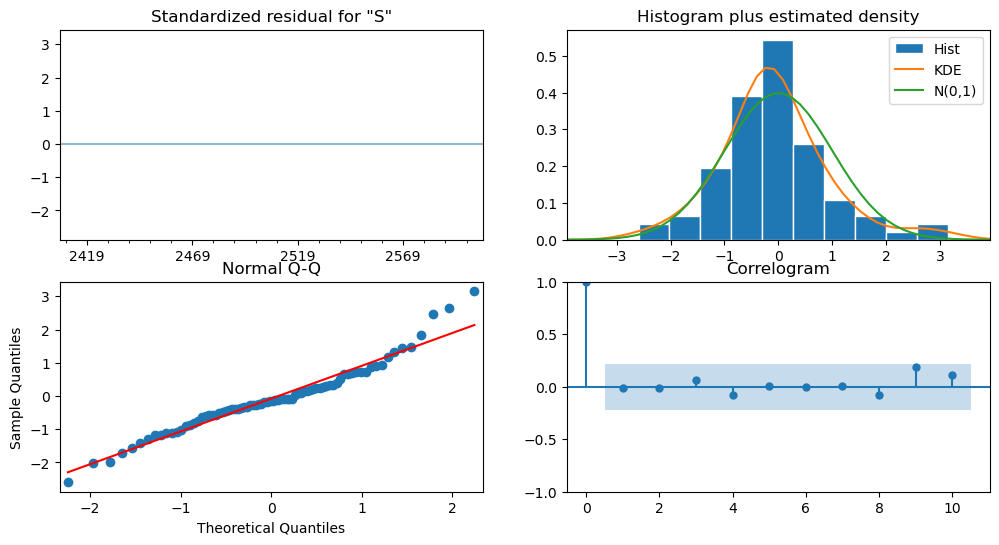

In [123]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

### 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [124]:
RMSE_df.sort_values(by='Test RMSE', ascending=True)

Test RMSE
SARIMA Model (3, 1, 2)x(3, 1, 2, 12)                  327.389183
Alpha=0.3, Beta=0.3, Gamma=0.3, Triple Exponent...    361.397300
Alpha=0.112, Beta=0.05, Gamma=0.36, Triple Expo...    406.510170
Simple Average Approach                              1275.081804
9pointTrailingMovingAverage                          1275.362301
Linear Regression OnTime                             1275.867052
ARIMA Model (2,1,2)                                  1299.979829
Alpha=0.05, Simple Exponential Smoothing             1316.034674
Alpha =0.69, Beta=0, Double Exponential Smoothing    1316.034674
2pointTrailingMovingAverage                          1384.568287
4pointTrailingMovingAverage                          1403.449947
6pointTrailingMovingAverage                          1427.043202
Alpha=0.3,Simple Exponential Smoothing               1935.507132
Naive Approach                                       3864.279352
Alpha=0.3, Beta=0.3, Double Exponential Smoothing   18259.110704

## 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

In [125]:
Sparkling_full_data_model = sm.tsa.statespace.SARIMAX(treated_sparkling_df['Sparkling'],
                                                      order=(3, 1, 2),
                                                      seasonal_order=(3, 1, 2, 12),
                                                      enforce_stationarity=False,
                                                      enforce_invertibility=False)
results_full_data_model = Sparkling_full_data_model.fit()
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1002.174
Date:                            Sun, 03 Sep 2023   AIC                           2026.348
Time:                                    23:36:36   BIC                           2058.306
Sample:                                01-01-1980   HQIC                          2039.335
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8635      0.124     -6.946      0.000      -1.107      -0.620
ar.L2          0.0053      0.166   

In [126]:
RMSE_Sparkling_full_data_model = mean_squared_error(treated_sparkling_df['Sparkling'],results_full_data_model.fittedvalues,squared=False)

print('RMSE:',RMSE_Sparkling_full_data_model)

RMSE: 577.9916227402844


In [127]:
Predicted_Sparkling_Wine_Sales = results_full_data_model.forecast(steps=12)

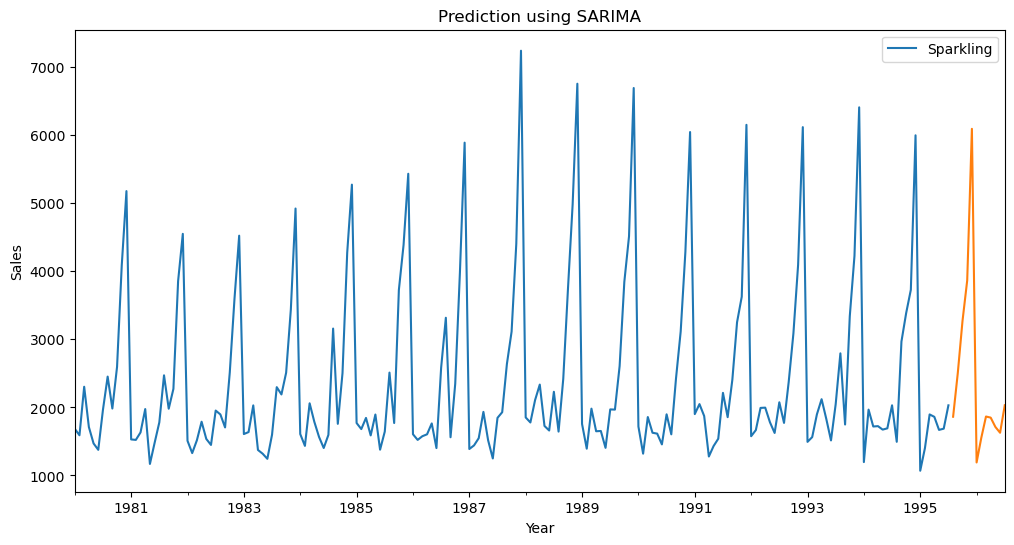

In [128]:
treated_sparkling_df.plot()
plt.title('Prediction using SARIMA')
plt.xlabel('Year')
plt.ylabel('Sales')
Predicted_Sparkling_Wine_Sales.plot()
plt.show()

In [129]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
Predicted_Sparkling_Wine_Sales_df = pd.DataFrame({'Lower_CI':Predicted_Sparkling_Wine_Sales - 1.96*np.std(results_full_data_model.resid,ddof=1),
                                              'Prediction':Predicted_Sparkling_Wine_Sales,
                                              'Upper_CI': Predicted_Sparkling_Wine_Sales + 1.96*np.std(results_full_data_model.resid,ddof=1)})
Predicted_Sparkling_Wine_Sales_df

Lower_CI   Prediction     Upper_CI
1995-08-01   730.269792  1863.391251  2996.512710
1995-09-01  1374.719235  2507.840694  3640.962153
1995-10-01  2138.169600  3271.291059  4404.412517
1995-11-01  2733.144601  3866.266060  4999.387518
1995-12-01  4961.221664  6094.343123  7227.464582
1996-01-01    58.361840  1191.483299  2324.604758
1996-02-01   420.347237  1553.468696  2686.590154
1996-03-01   733.310581  1866.432040  2999.553499
1996-04-01   717.225763  1850.347222  2983.468681
1996-05-01   580.264715  1713.386174  2846.507633
1996-06-01   494.968829  1628.090287  2761.211746
1996-07-01   899.330437  2032.451896  3165.573355

In [125]:
Predicted_Sparkling_Wine_Sales_df['Prediction']

1995-08-01    1863.391251
1995-09-01    2507.840694
1995-10-01    3271.291059
1995-11-01    3866.266060
1995-12-01    6094.343123
1996-01-01    1191.483299
1996-02-01    1553.468696
1996-03-01    1866.432040
1996-04-01    1850.347222
1996-05-01    1713.386174
1996-06-01    1628.090287
1996-07-01    2032.451896
Freq: MS, Name: Prediction, dtype: float64

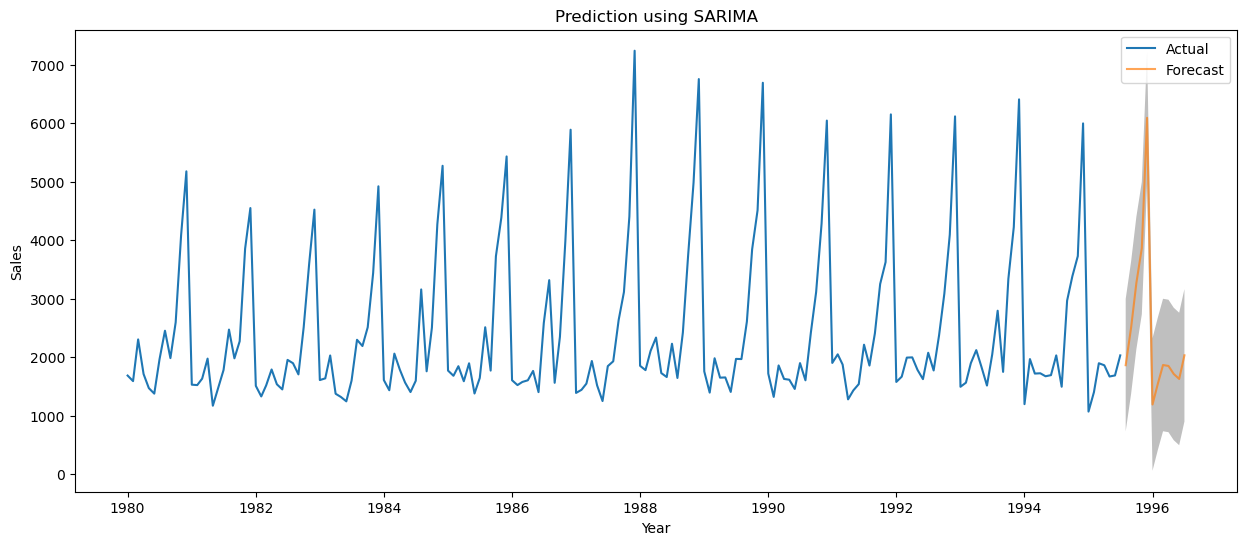

In [130]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# plot the forecast along with the confidence band
fig, ax = plt.subplots(1)
ax.plot(treated_sparkling_df, label='Actual')
ax.plot(Predicted_Sparkling_Wine_Sales_df['Prediction'], label='Forecast', alpha=0.7)
ax.fill_between(x=Predicted_Sparkling_Wine_Sales_df.index, y1=Predicted_Sparkling_Wine_Sales_df['Lower_CI'], 
                  y2=Predicted_Sparkling_Wine_Sales_df['Upper_CI'], facecolor='k', alpha=.25)
plt.title('Prediction using SARIMA')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()